In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import Adagrad

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

from gensim.models import Doc2Vec

C:\Users\twitter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/03_DocEmbeddings_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

## Load an restore textdate to create embeddings from them

In [5]:
def create_restore_text(index_file, data_file, MAXLEN):
   
    loaded_word_index = {}
    with open(index_file, 'r', encoding='utf-8') as word_index: #Decoding utf-8, else exception
        for line in word_index:
            line = line.rstrip().split("\t")
            loaded_word_index[line[0]] = line[1]  
            
    loaded_data =[]
    with open(data_file, 'r', encoding='utf-8') as data: #Decoding utf-8, else exception
        for line in data:
            line = line.rstrip().split('\n')
            loaded_data.append(line) 
            
    recunstructed_data = []
    for line in loaded_data:
        for string in line:
            tweet = []
            string = string.rstrip().split(',')
            for item in string:
                if item is not ('0'):
                    for key, value in loaded_word_index.items():
                        if value == item:
                            tweet.append(key)
            recunstructed_data.append(tweet)
    return recunstructed_data

In [6]:
sentence_train = create_restore_text('output_trainTestData/SamEval_word_index.csv','output_trainTestData/SamEval_train_data.csv', MAX_SEQUENCE_LENGTH)

In [7]:
sentence_test = create_restore_text('output_trainTestData/SamEval_word_index.csv','output_trainTestData/SamEval_test_data.csv', MAX_SEQUENCE_LENGTH)

In [8]:
doc_embed = Doc2Vec.load(path+'Doc2Vec.model')

C:\Users\twitter\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Train the model

In [9]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
optimizer = Adagrad(lr=0.001)
lossfunction = 'binary_crossentropy'
softmax = True

Instructions for updating:
Colocations handled automatically by placer.


## Document embeddings

In [10]:
train_embeddings = []
for sentence in sentence_train:
    embed = doc_embed.infer_vector(sentence)
    train_embeddings.append(embed)

In [80]:
test_embeddings = []
for sentence in sentence_test:
    embed = doc_embed.infer_vector(sentence)
    test_embeddings.append(embed)

In [11]:
#Input Layer
comment_input = Input(shape=(300,), dtype='float32')

#Dense Layer
x = Dense(600, activation='relu')(comment_input)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1202      
Total params: 181,802
Trainable params: 181,802
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


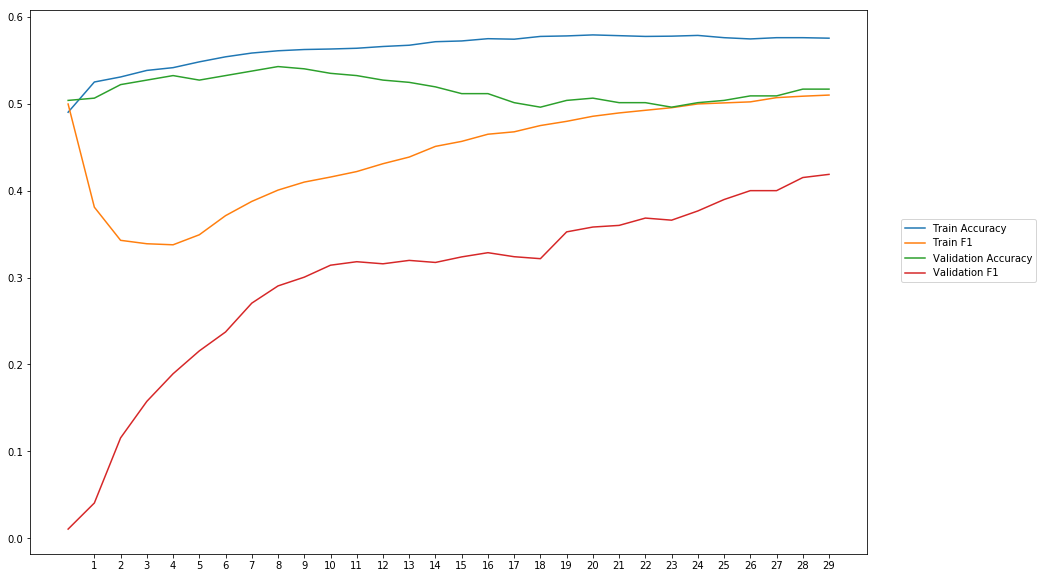

Average Accuracy: 51.66%
Average Precision: 58.17%
Average Recall: 21.84%
Average F1: 29.72%

-----Fold 2--------


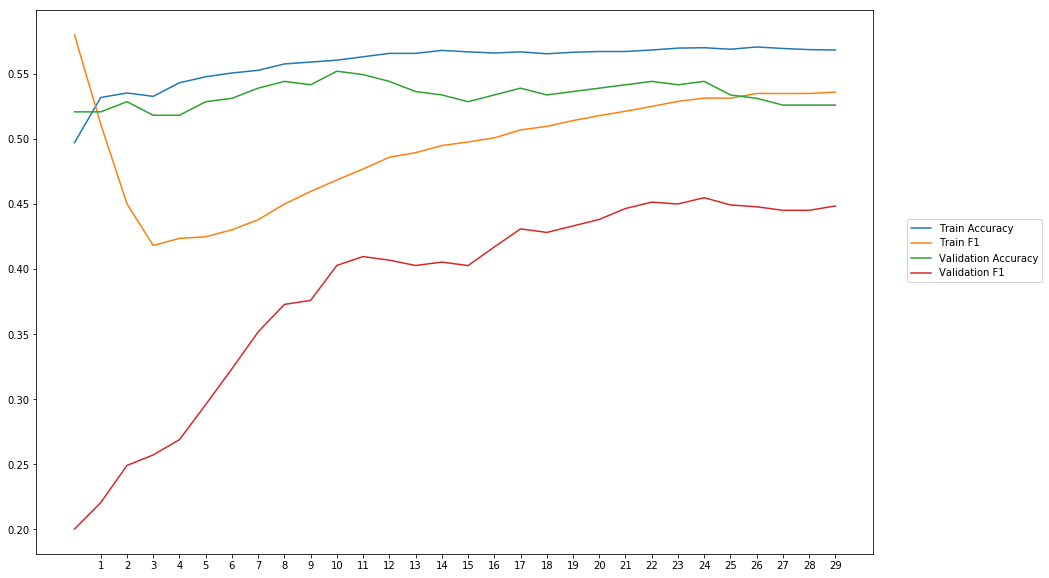

Average Accuracy: 53.45%
Average Precision: 56.31%
Average Recall: 30.16%
Average F1: 38.43%

-----Fold 3--------


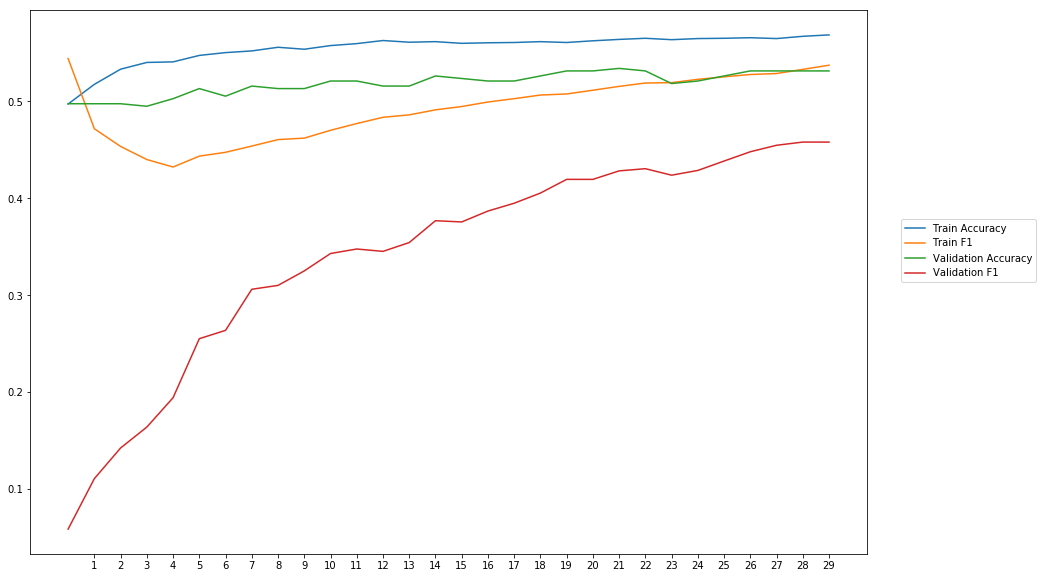

Average Accuracy: 51.86%
Average Precision: 52.30%
Average Recall: 26.70%
Average F1: 34.21%

-----Fold 4--------


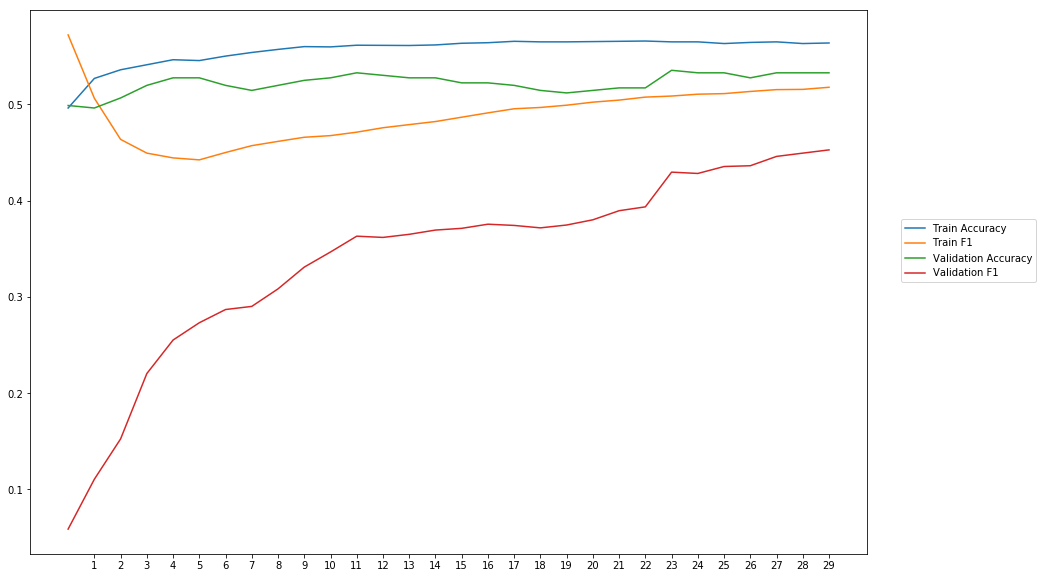

Average Accuracy: 52.21%
Average Precision: 54.17%
Average Recall: 25.92%
Average F1: 34.00%

-----Fold 5--------


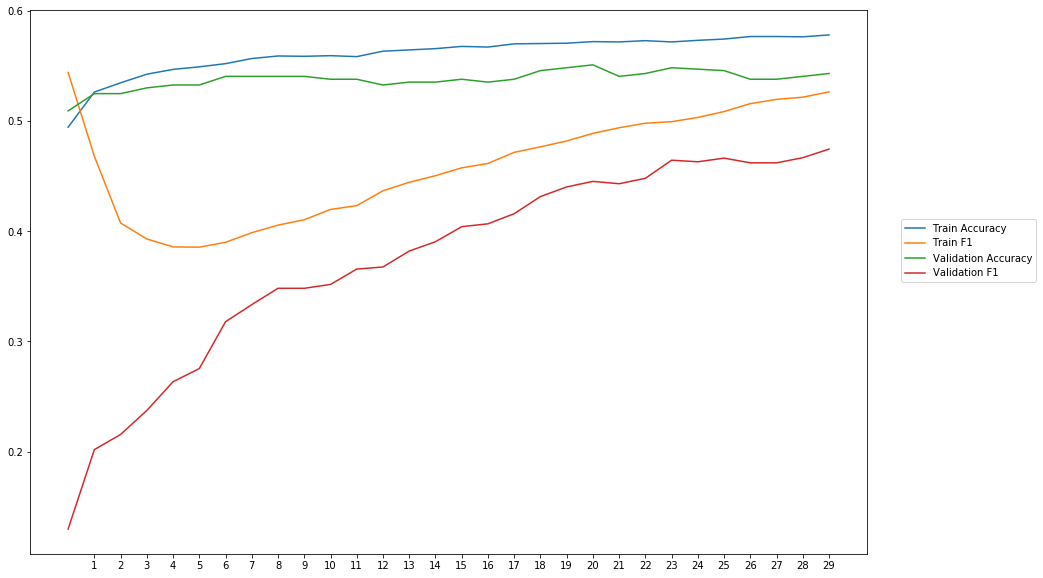

Average Accuracy: 53.78%
Average Precision: 57.84%
Average Recall: 28.97%
Average F1: 37.40%

-----Fold 6--------


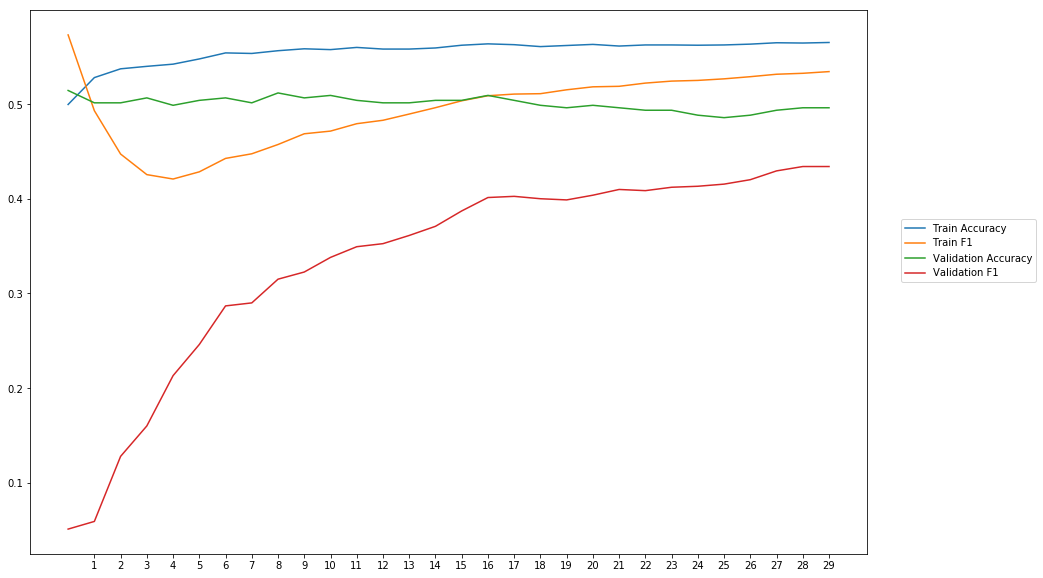

Average Accuracy: 50.04%
Average Precision: 51.67%
Average Recall: 26.86%
Average F1: 33.38%

-----Fold 7--------


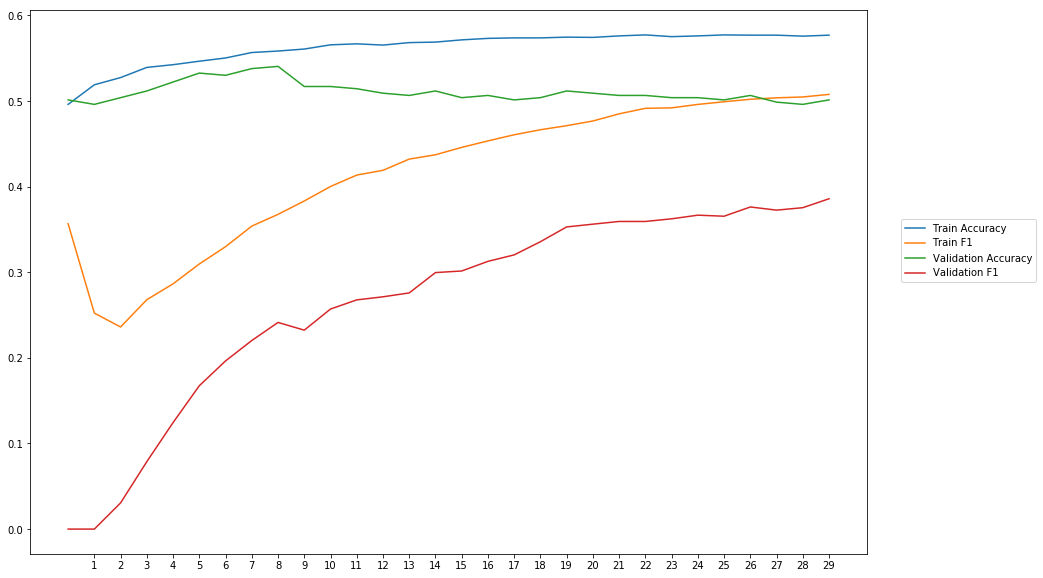

Average Accuracy: 51.04%
Average Precision: 51.94%
Average Recall: 19.27%
Average F1: 26.55%

-----Fold 8--------


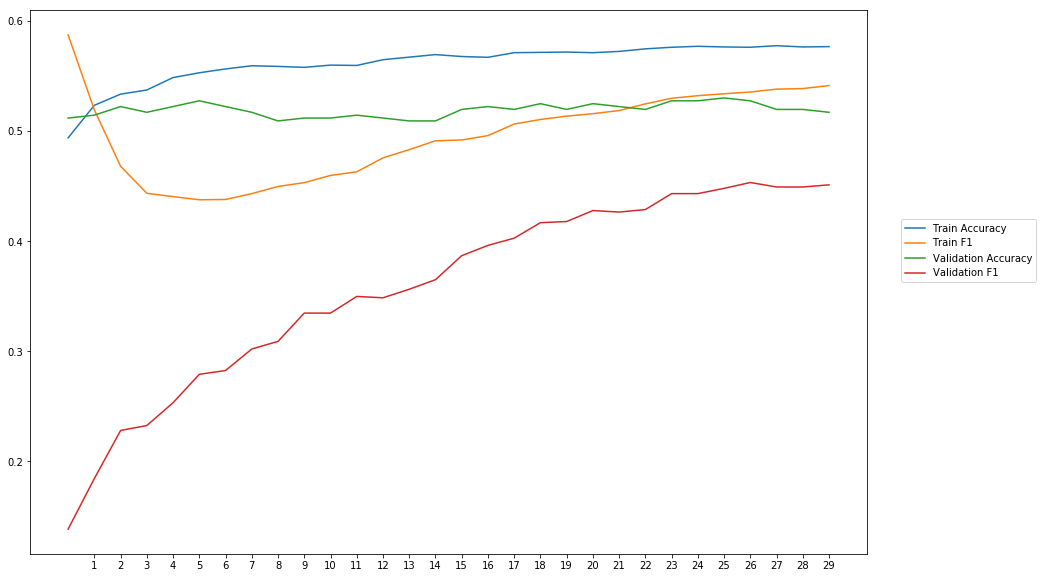

Average Accuracy: 51.91%
Average Precision: 53.89%
Average Recall: 28.08%
Average F1: 35.78%

-----Fold 9--------


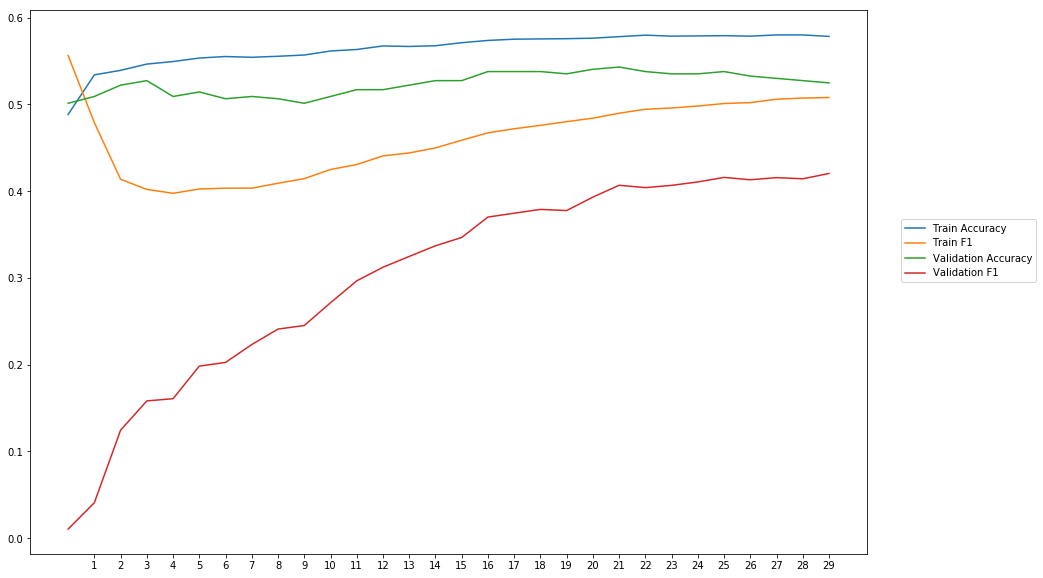

Average Accuracy: 52.40%
Average Precision: 56.84%
Average Recall: 22.25%
Average F1: 30.31%

-----Fold 10--------


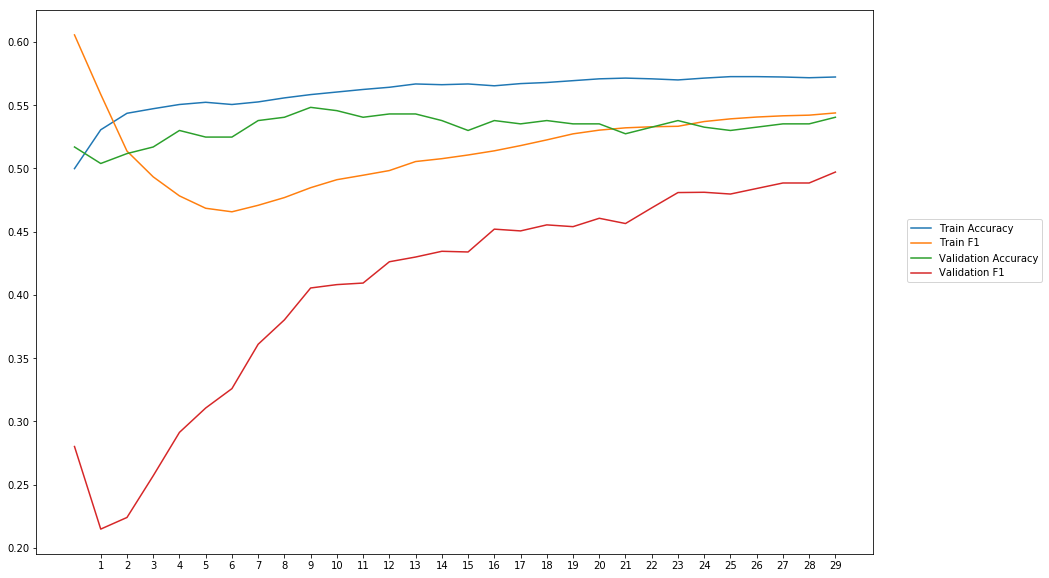

Average Accuracy: 53.27%
Average Precision: 55.37%
Average Recall: 33.32%
Average F1: 40.64%

-------Overallresults-------


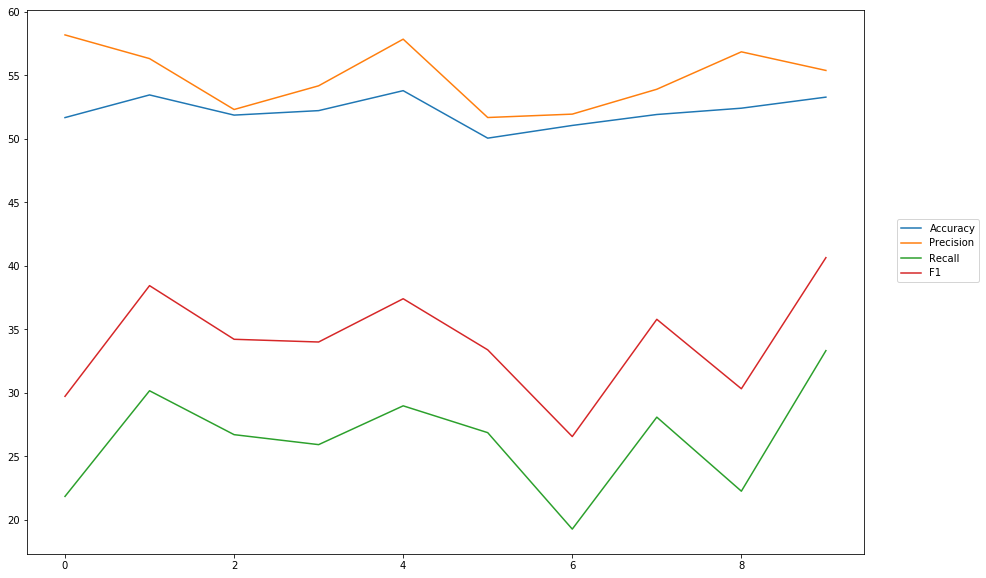

Accuracy: Mean = 52.16% (+/- 1.08%), Max = 53.78%, Min =  50.04%
Precision: Mean = 54.85% (+/- 2.30%), Max = 58.17%, Min =  51.67%
Recall: Mean = 26.34% (+/- 4.01%), Max = 33.32%, Min =  19.27%
F1: Mean = 34.04% (+/- 4.08%), Max = 40.64%, Min =  26.55%


In [12]:
cross_val(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_embeddings, train_labels, softmax, outputpath, 'onlyDocEmbed')

## Word Embeddings on Doc2Vec

In [10]:
word_vectors = doc_embed.wv

EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [11]:
#Embedding Layer
wv_layer_2 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)

#Input Layer
comment_input_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

embedded_sequences_2 = wv_layer_2(comment_input_2)

#Dense Layer
x_2 = Dense(600, activation='relu')(embedded_sequences_2)

x_2 = Flatten()(x_2)

#Output (Dense) Layer
preds_2 = Dense(2, activation='softmax')(x_2)

# build the model
model_2 = Model(inputs=[comment_input_2], outputs=preds_2)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 40, 300)           4118700   
_________________________________________________________________
dense_1 (Dense)              (None, 40, 600)           180600    
_________________________________________________________________
flatten_1 (Flatten)          (None, 24000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 48002     
Total params: 4,347,302
Trainable params: 4,347,302
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


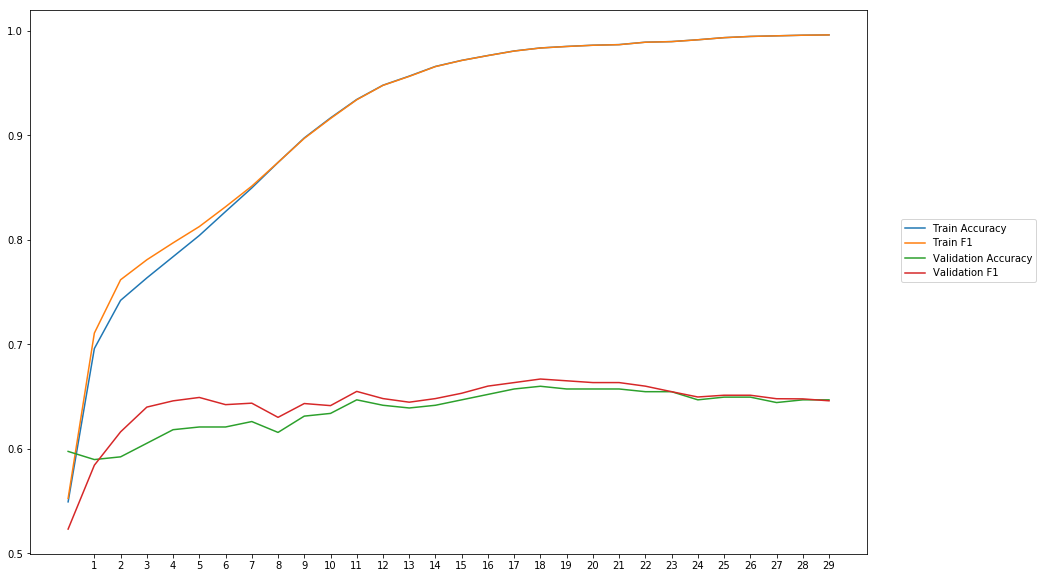

Average Accuracy: 63.66%
Average Precision: 63.05%
Average Recall: 65.87%
Average F1: 64.32%

-----Fold 2--------


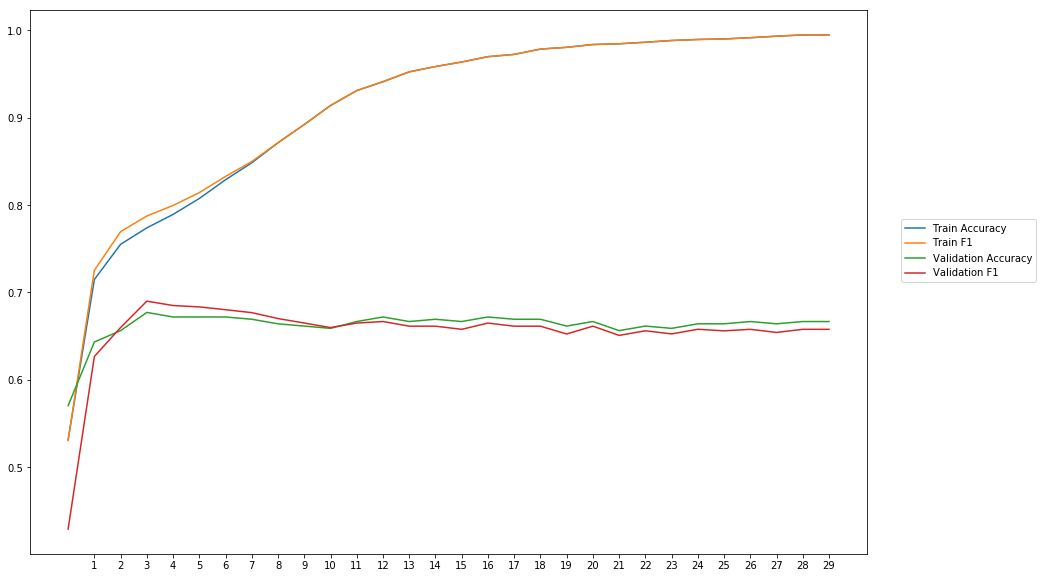

Average Accuracy: 66.22%
Average Precision: 66.36%
Average Recall: 64.97%
Average F1: 65.47%

-----Fold 3--------


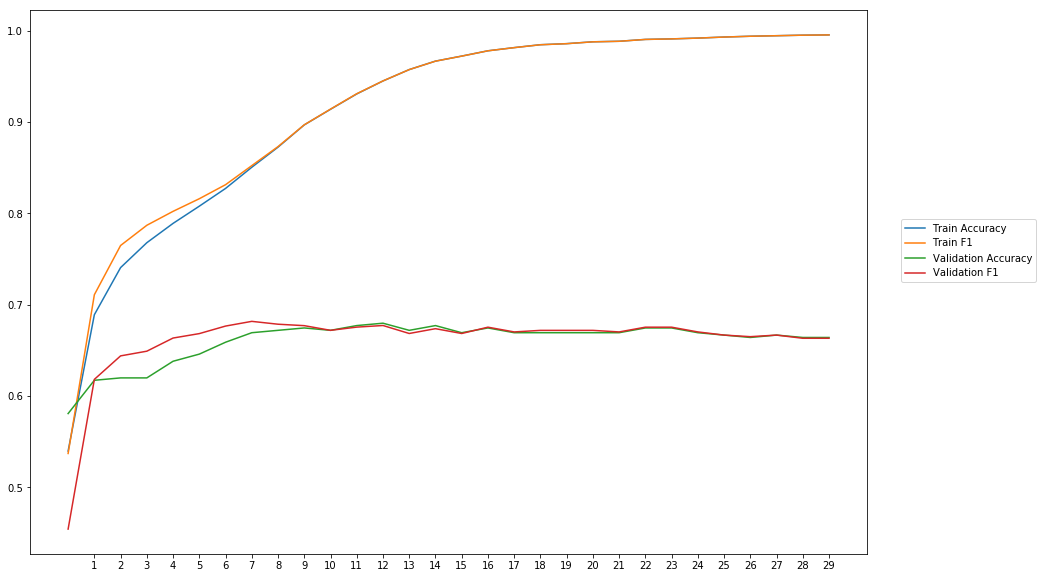

Average Accuracy: 66.02%
Average Precision: 65.57%
Average Recall: 67.00%
Average F1: 66.07%

-----Fold 4--------


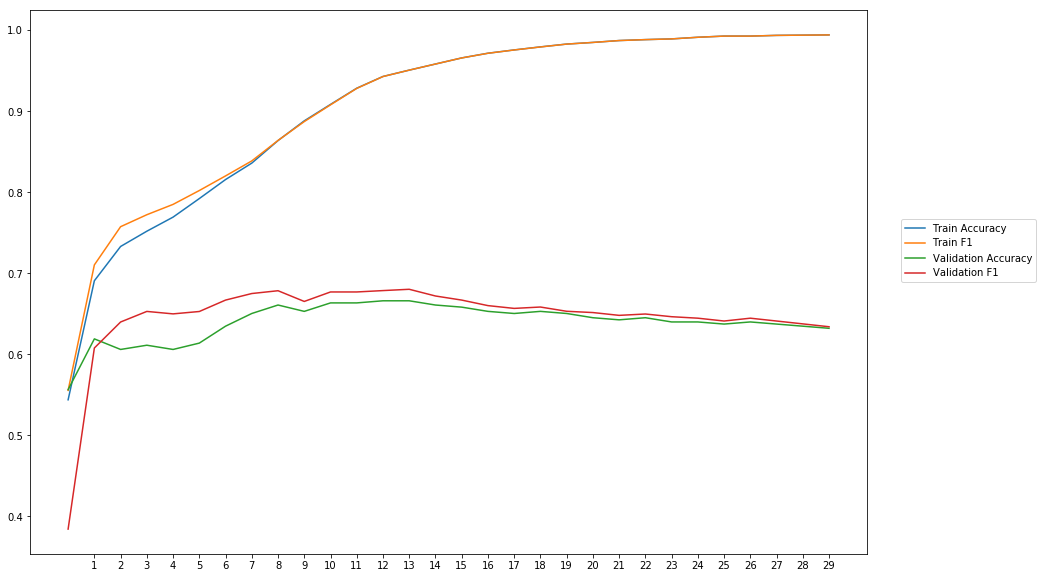

Average Accuracy: 63.94%
Average Precision: 63.14%
Average Recall: 66.86%
Average F1: 64.61%

-----Fold 5--------


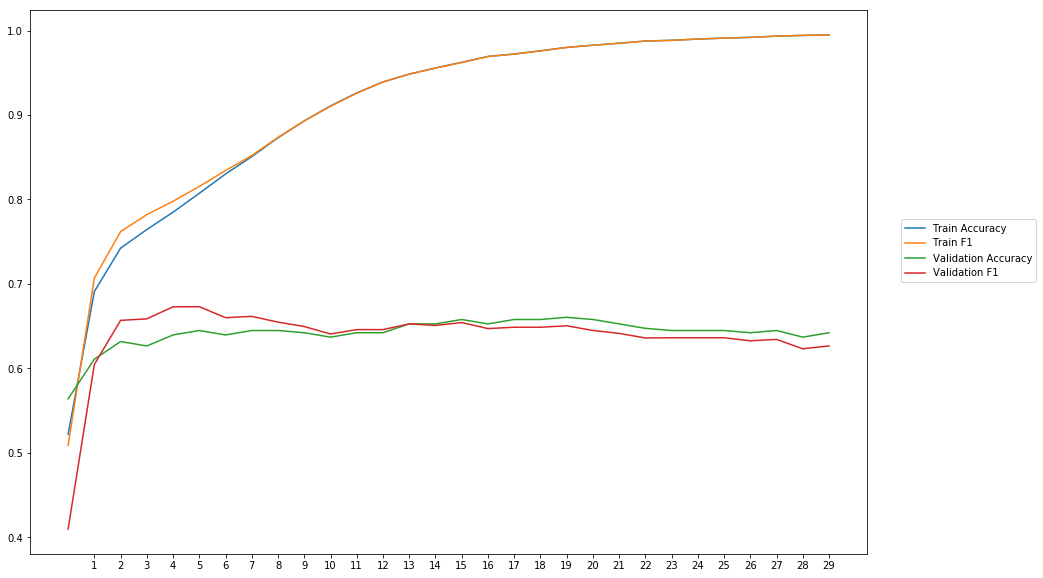

Average Accuracy: 64.21%
Average Precision: 64.28%
Average Recall: 63.89%
Average F1: 63.79%

-----Fold 6--------


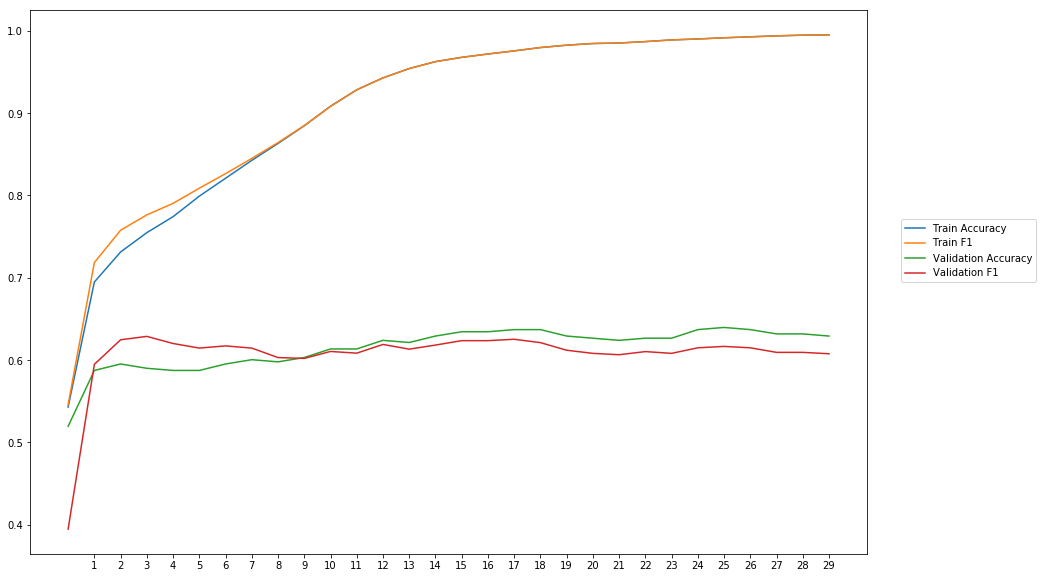

Average Accuracy: 61.50%
Average Precision: 61.88%
Average Recall: 59.90%
Average F1: 60.66%

-----Fold 7--------


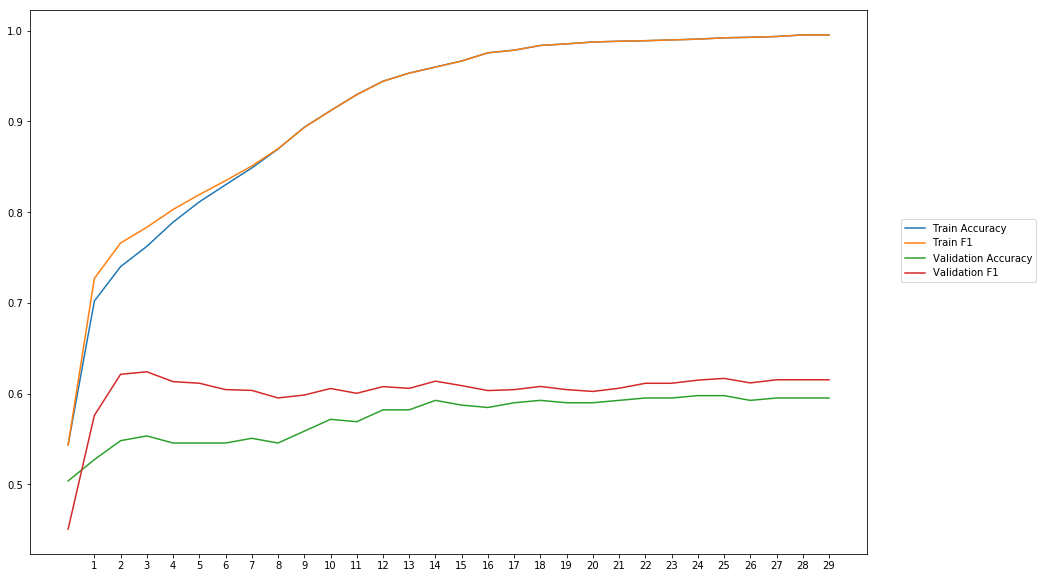

Average Accuracy: 57.39%
Average Precision: 56.41%
Average Recall: 65.08%
Average F1: 60.28%

-----Fold 8--------


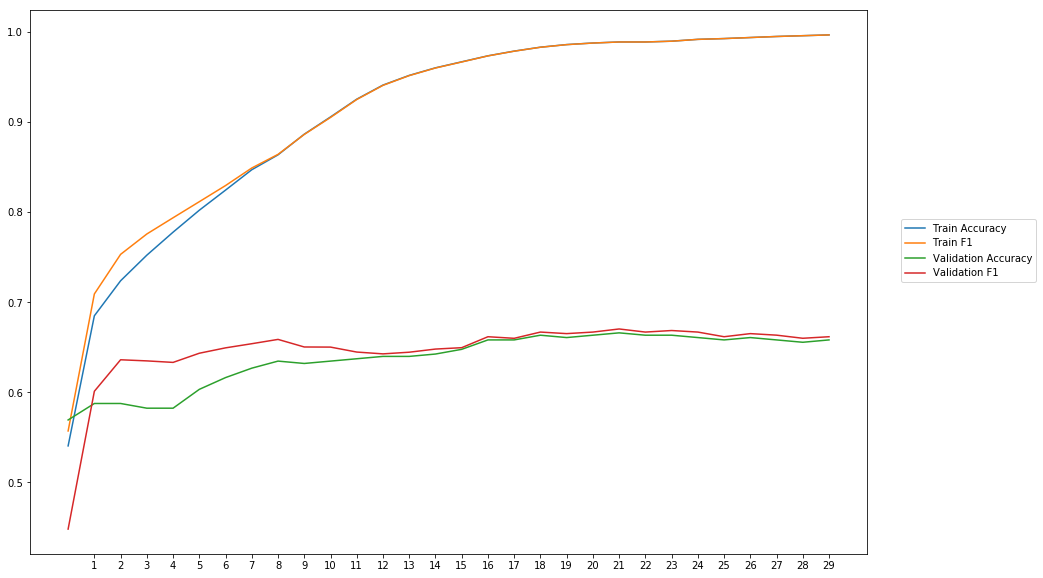

Average Accuracy: 63.69%
Average Precision: 62.96%
Average Recall: 66.91%
Average F1: 64.63%

-----Fold 9--------


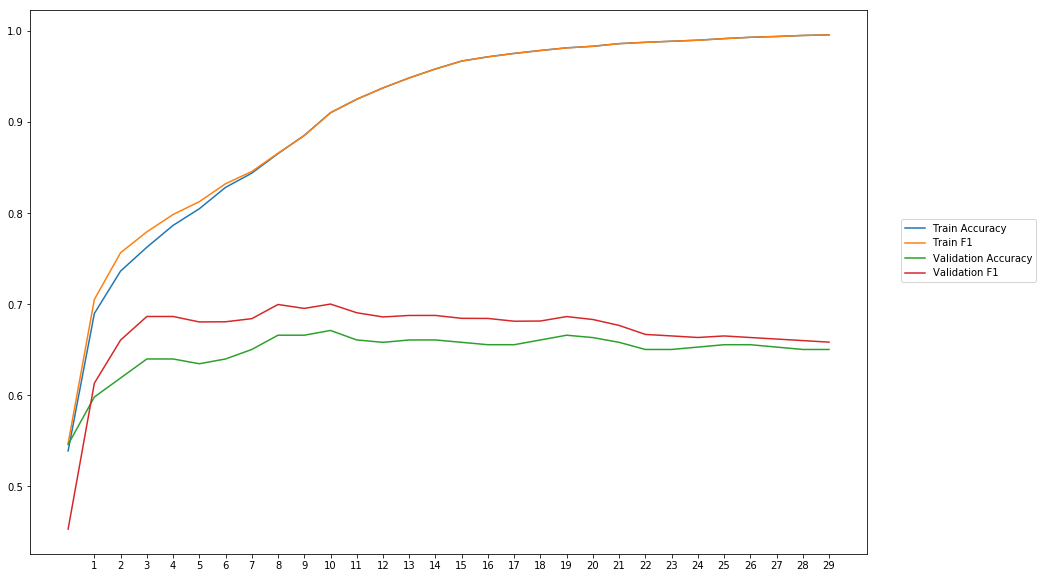

Average Accuracy: 64.80%
Average Precision: 62.82%
Average Recall: 71.97%
Average F1: 66.90%

-----Fold 10--------


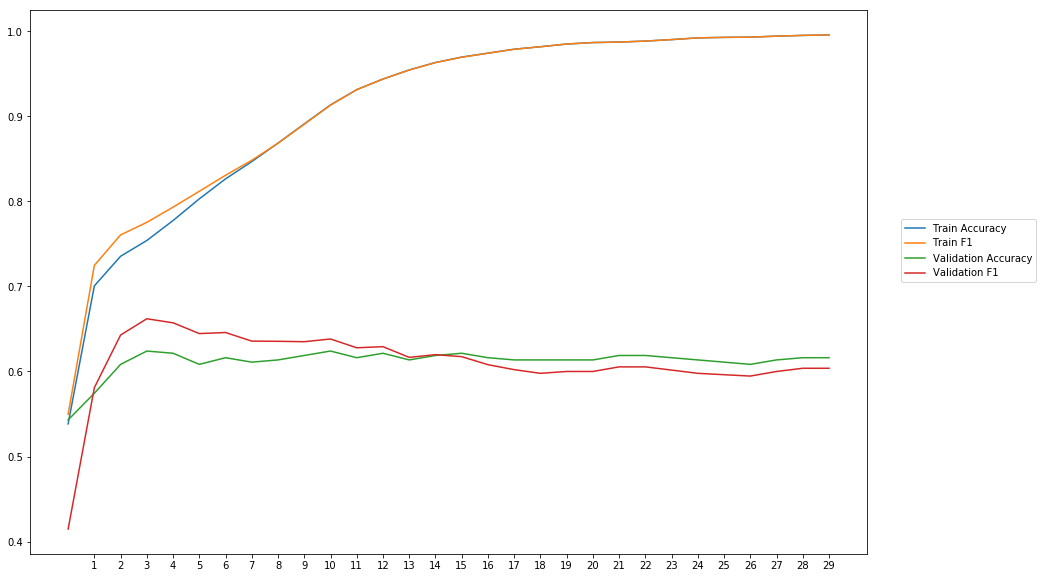

Average Accuracy: 61.19%
Average Precision: 61.01%
Average Recall: 61.66%
Average F1: 61.07%

-------Overallresults-------


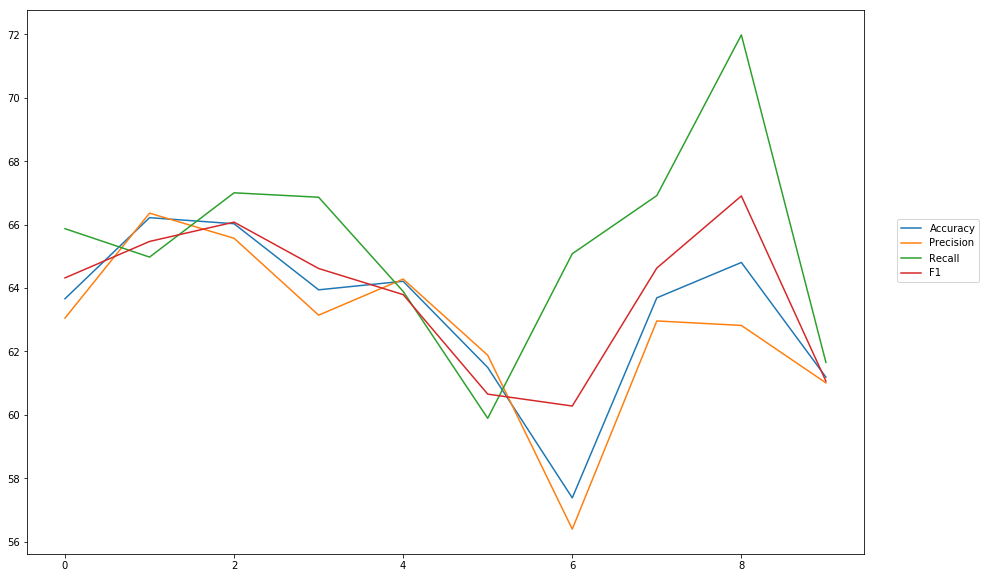

Accuracy: Mean = 63.26% (+/- 2.50%), Max = 66.22%, Min =  57.39%
Precision: Mean = 62.75% (+/- 2.60%), Max = 66.36%, Min =  56.41%
Recall: Mean = 65.41% (+/- 3.12%), Max = 71.97%, Min =  59.90%
F1: Mean = 63.78% (+/- 2.21%), Max = 66.90%, Min =  60.28%


In [15]:
cross_val(model_2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'WordEmbedOnDocEmbed')

## Phrase Embedding

In [53]:
def getPhrases(groupLen):
    sentences = []
    #Maximal sequence lengt for all sentences
    maxCountPhrases = round((MAX_SEQUENCE_LENGTH / groupLen) + 0.5)

    for sentence in sentence_train:
        sent = []
        countPhrases = 0
        i = 0
        for entry in sentence:
            if i == 0:
                phrase =[]
                phrase.append(entry)
                i+=1
            elif  i < (groupLen-1):
                phrase.append(entry)
                i+=1
            elif i == (groupLen-1):
                phrase.append(entry)
                sent.append(phrase)
                countPhrases +=1
                i = 0
        if  i < (groupLen-1):
            sent.append(phrase)
            countPhrases +=1
        # case when one sentence got less than 3 words
        while countPhrases < maxCountPhrases:
            sent.append([''])
            countPhrases +=1
        sentences.append(sent)

    return sentences, maxCountPhrases

### 3 token

In [54]:
sentences, MAX_SENTENCE_LENGTH = getPhrases(3)
train_embedding_sentences =[]
for sentence in sentences:
    phr_sent_embedding =[]
    for phrase in sentence:
        phrase_embedding = doc_embed.infer_vector(phrase)
        phr_sent_embedding.append(phrase_embedding)
    train_embedding_sentences.append(phr_sent_embedding)

In [56]:
#Input Layer
comment_input_3 = Input(shape=(MAX_SENTENCE_LENGTH,300), dtype='float32')

#Dense Layer
x_3 = Dense(600, activation='relu')(comment_input_3)

x_3 = Flatten()(x_3)

#Output (Dense) Layer
preds_3 = Dense(2, activation='softmax')(x_3)

# build the model
model_3 = Model(inputs=[comment_input_3], outputs=preds_3)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 14, 300)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 14, 600)           180600    
_________________________________________________________________
flatten_3 (Flatten)          (None, 8400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 16802     
Total params: 197,402
Trainable params: 197,402
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


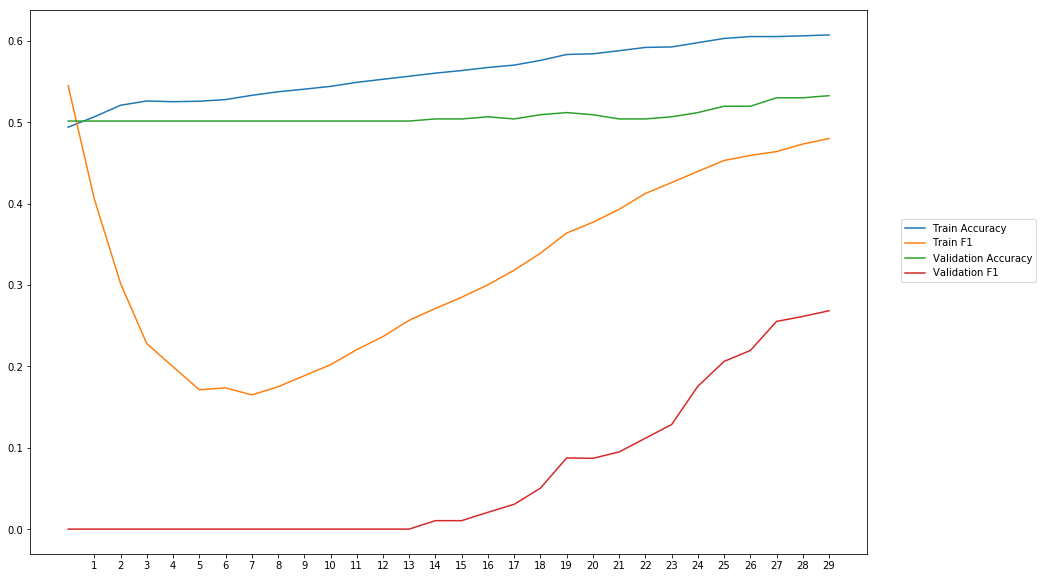

Average Accuracy: 50.74%
Average Precision: 35.62%
Average Recall: 4.03%
Average F1: 6.72%

-----Fold 2--------


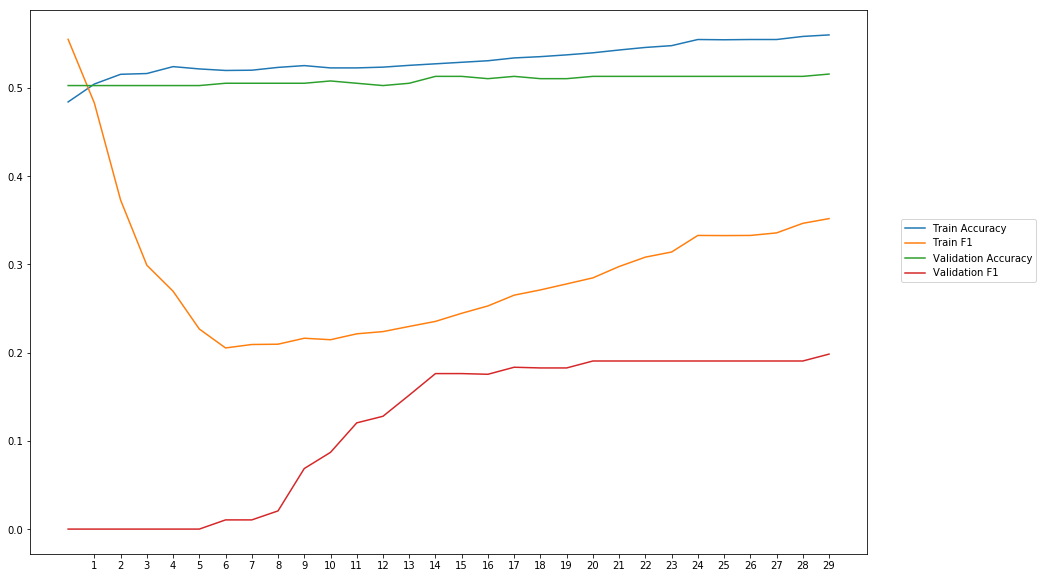

Average Accuracy: 50.87%
Average Precision: 46.98%
Average Recall: 7.12%
Average F1: 11.95%

-----Fold 3--------


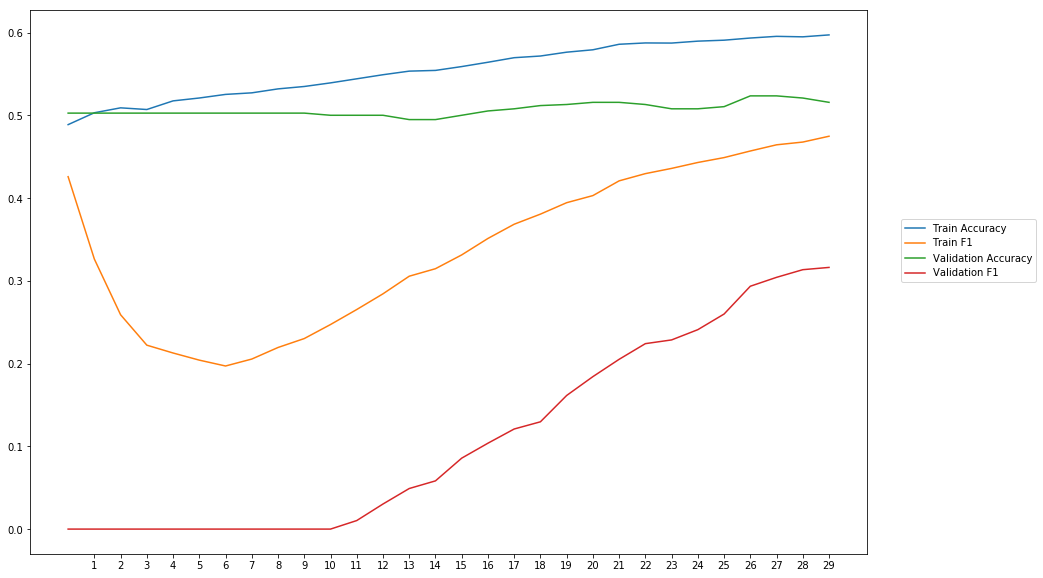

Average Accuracy: 50.69%
Average Precision: 32.08%
Average Recall: 7.09%
Average F1: 11.06%

-----Fold 4--------


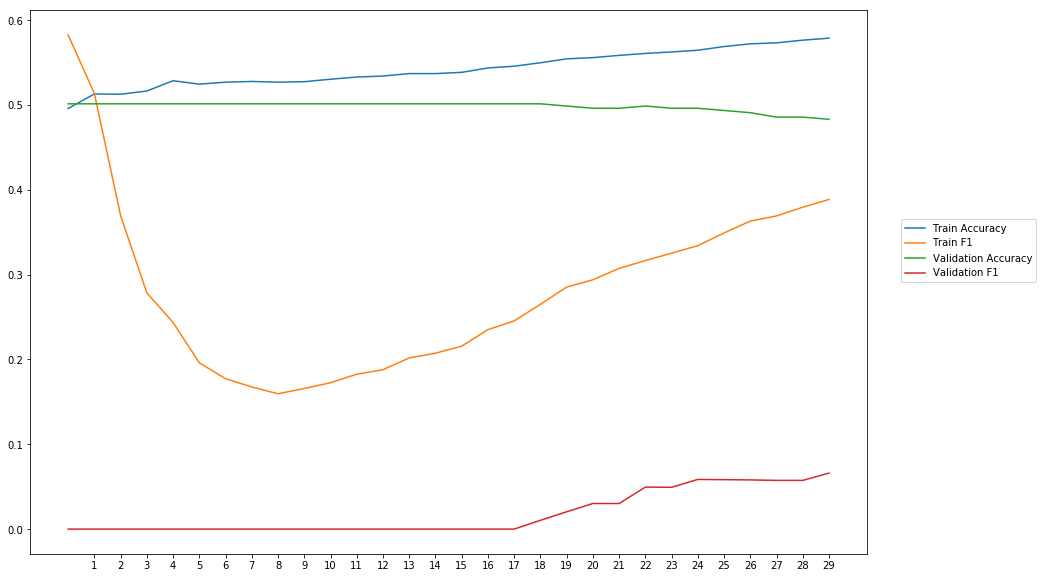

Average Accuracy: 49.82%
Average Precision: 15.75%
Average Recall: 0.98%
Average F1: 1.82%

-----Fold 5--------


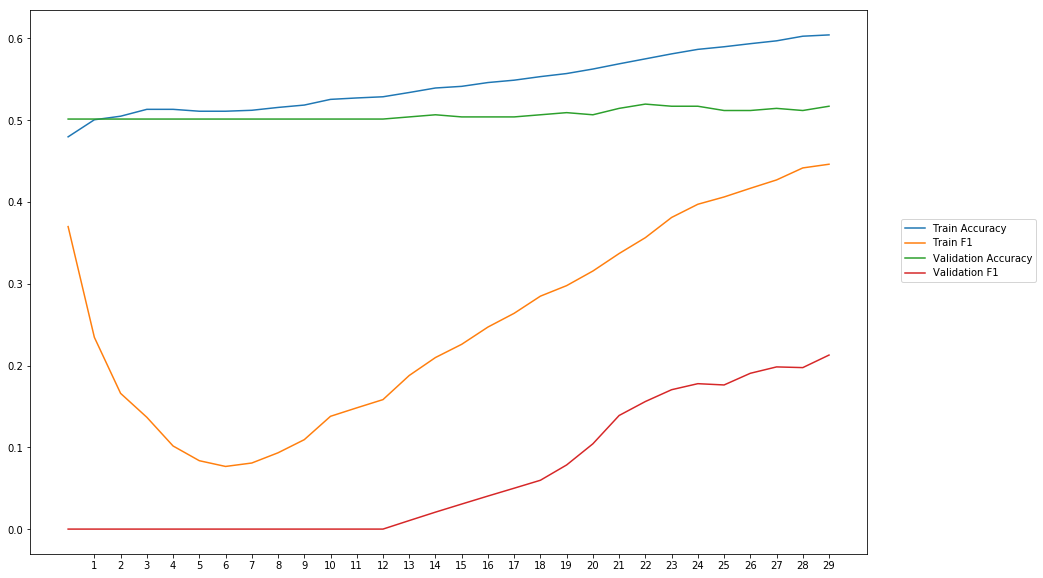

Average Accuracy: 50.65%
Average Precision: 35.62%
Average Recall: 3.91%
Average F1: 6.71%

-----Fold 6--------


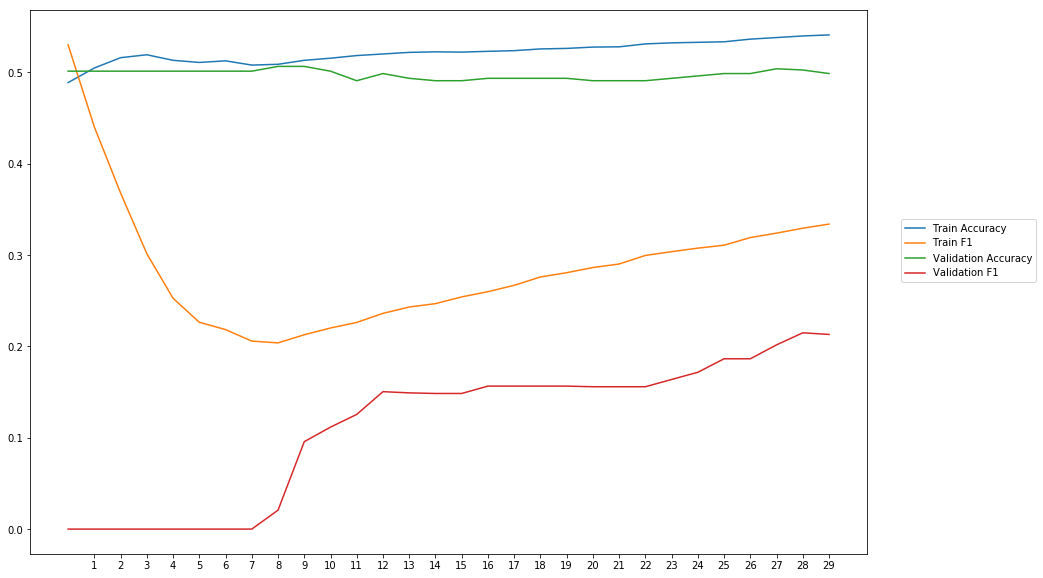

Average Accuracy: 49.76%
Average Precision: 36.53%
Average Recall: 6.82%
Average F1: 11.27%

-----Fold 7--------


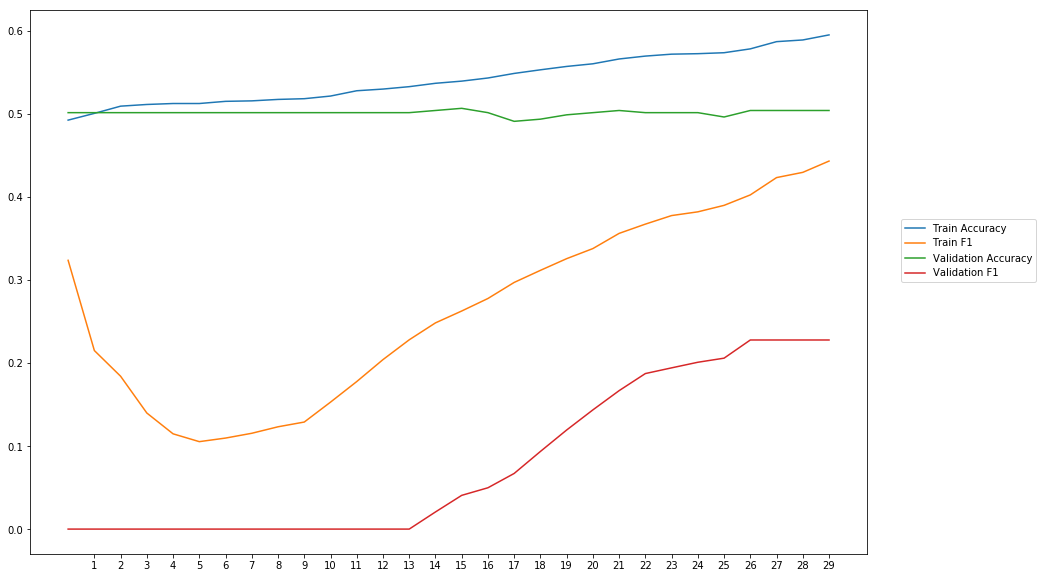

Average Accuracy: 50.11%
Average Precision: 27.23%
Average Recall: 4.92%
Average F1: 8.00%

-----Fold 8--------


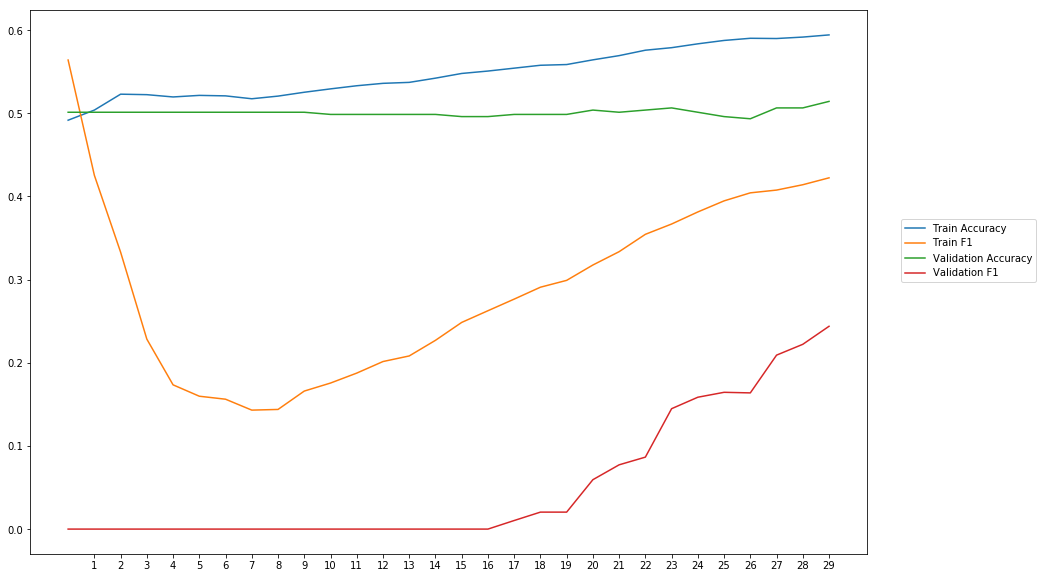

Average Accuracy: 50.10%
Average Precision: 20.88%
Average Recall: 3.18%
Average F1: 5.27%

-----Fold 9--------


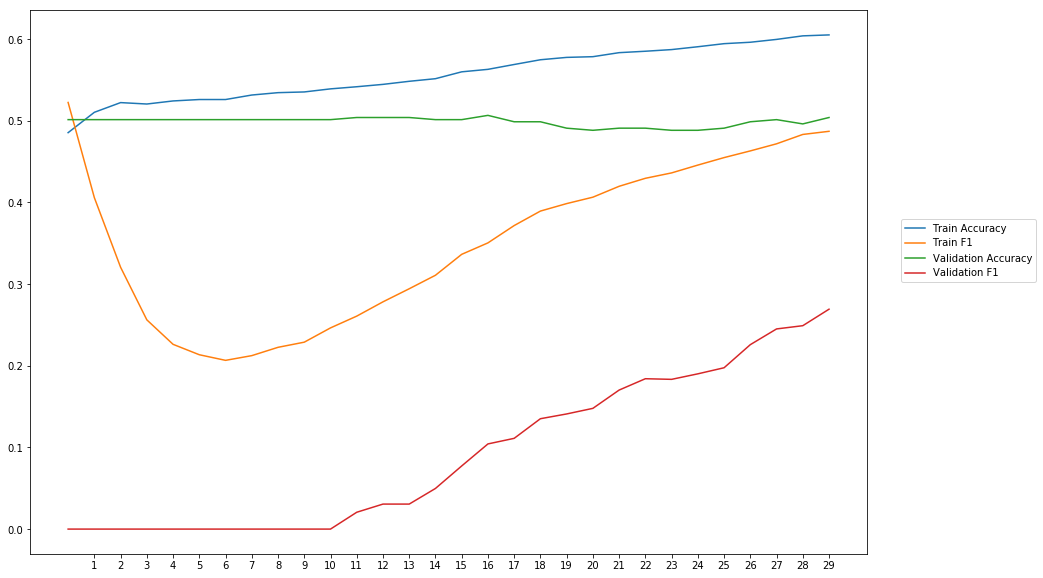

Average Accuracy: 49.87%
Average Precision: 31.73%
Average Recall: 5.74%
Average F1: 9.21%

-----Fold 10--------


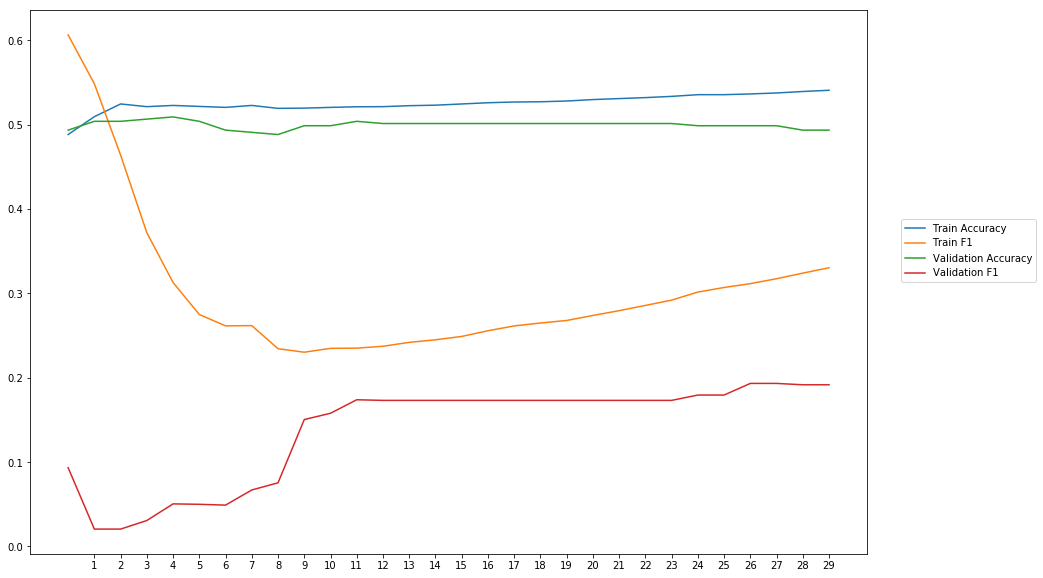

Average Accuracy: 49.97%
Average Precision: 51.07%
Average Recall: 8.31%
Average F1: 13.82%

-------Overallresults-------


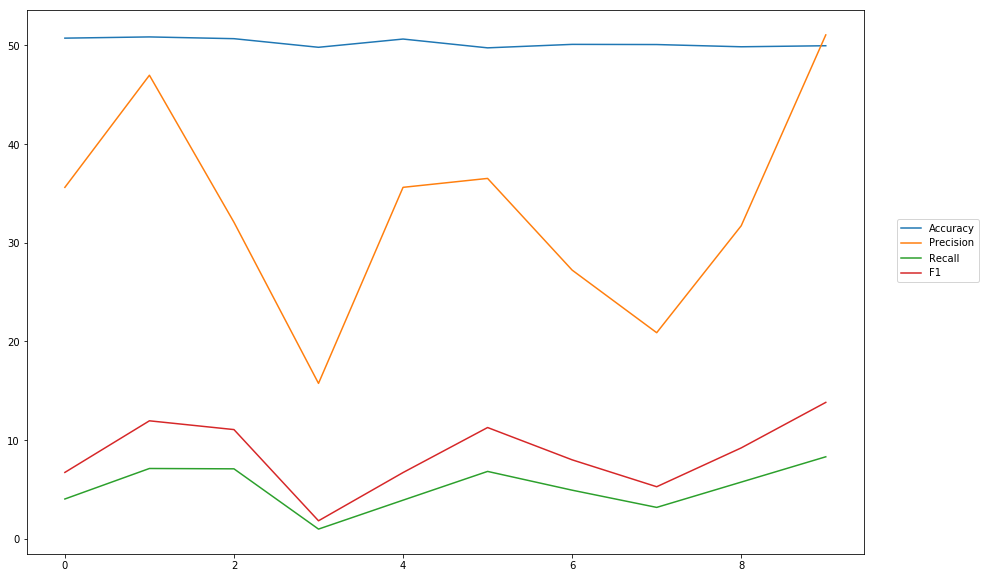

Accuracy: Mean = 50.26% (+/- 0.41%), Max = 50.87%, Min =  49.76%
Precision: Mean = 33.35% (+/- 10.13%), Max = 51.07%, Min =  15.75%
Recall: Mean = 5.21% (+/- 2.12%), Max = 8.31%, Min =  0.98%
F1: Mean = 8.58% (+/- 3.42%), Max = 13.82%, Min =  1.82%


In [57]:
cross_val(model_3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_embedding_sentences, train_labels, softmax, outputpath, 'phraseEmbed_3')

### 5 Token

In [58]:
sentences_5, MAX_SENTENCE_LENGTH_5 = getPhrases(5)
train_embedding_sentences_5 =[]
for sentence in sentences_5:
    phr_sent_embedding =[]
    for phrase in sentence:
        phrase_embedding = doc_embed.infer_vector(phrase)
        phr_sent_embedding.append(phrase_embedding)
    train_embedding_sentences_5.append(phr_sent_embedding)

In [59]:
#Input Layer
comment_input_4 = Input(shape=(MAX_SENTENCE_LENGTH_5,300), dtype='float32')

#Dense Layer
x_4 = Dense(600, activation='relu')(comment_input_4)

x_4 = Flatten()(x_4)

#Output (Dense) Layer
preds_4 = Dense(2, activation='softmax')(x_4)

# build the model
model_4 = Model(inputs=[comment_input_4], outputs=preds_4)
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 8, 300)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 8, 600)            180600    
_________________________________________________________________
flatten_4 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 9602      
Total params: 190,202
Trainable params: 190,202
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


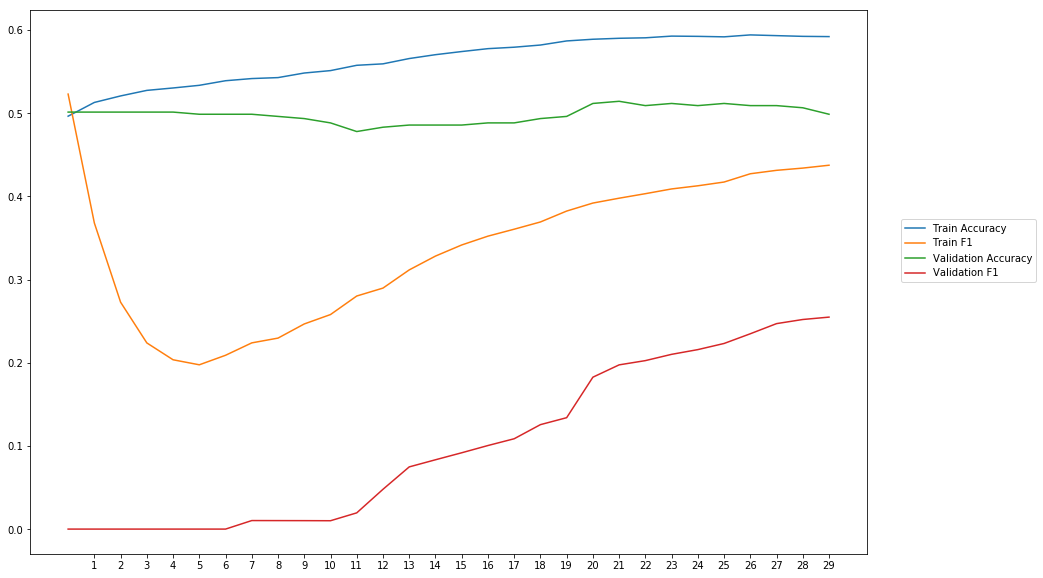

Average Accuracy: 49.85%
Average Precision: 31.87%
Average Recall: 6.27%
Average F1: 10.16%

-----Fold 2--------


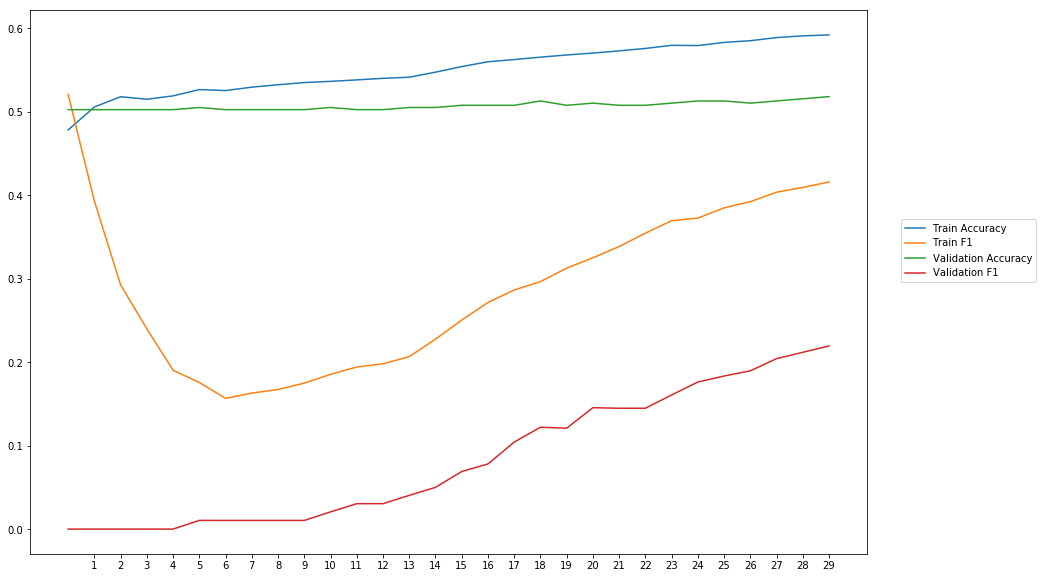

Average Accuracy: 50.71%
Average Precision: 47.02%
Average Recall: 4.85%
Average F1: 8.33%

-----Fold 3--------


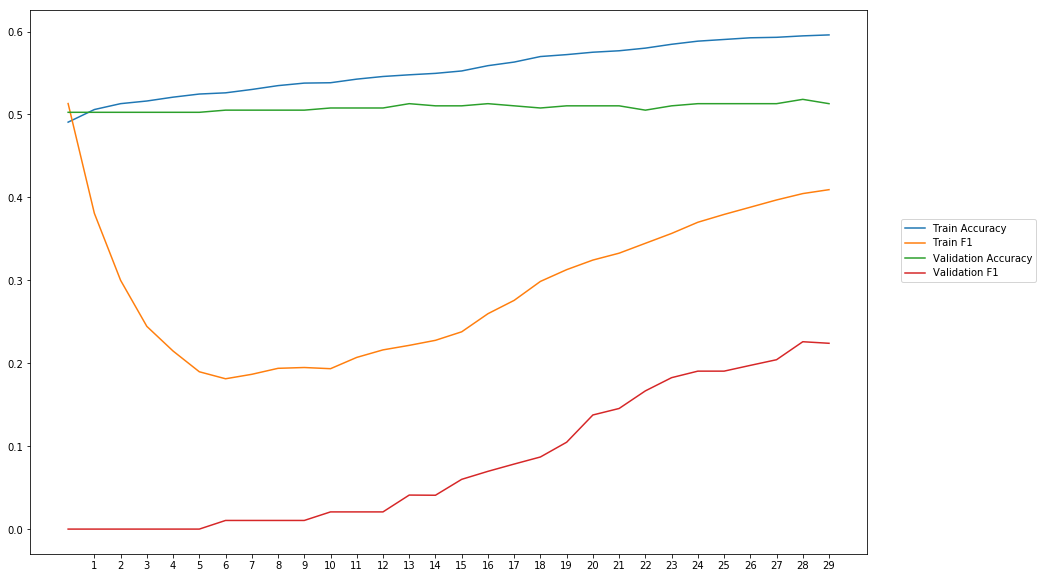

Average Accuracy: 50.85%
Average Precision: 57.93%
Average Recall: 4.80%
Average F1: 8.17%

-----Fold 4--------


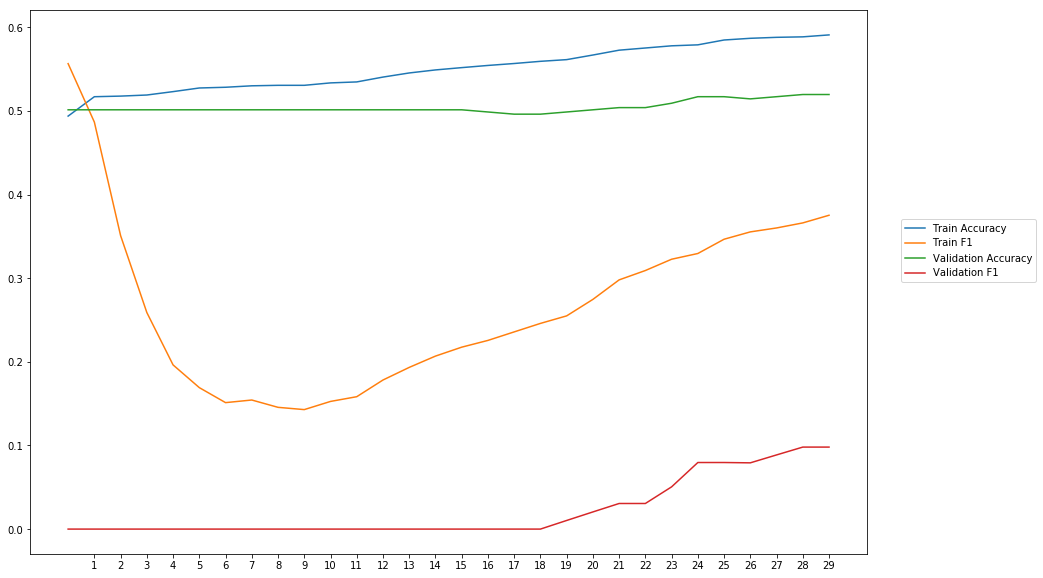

Average Accuracy: 50.44%
Average Precision: 24.54%
Average Recall: 1.17%
Average F1: 2.22%

-----Fold 5--------


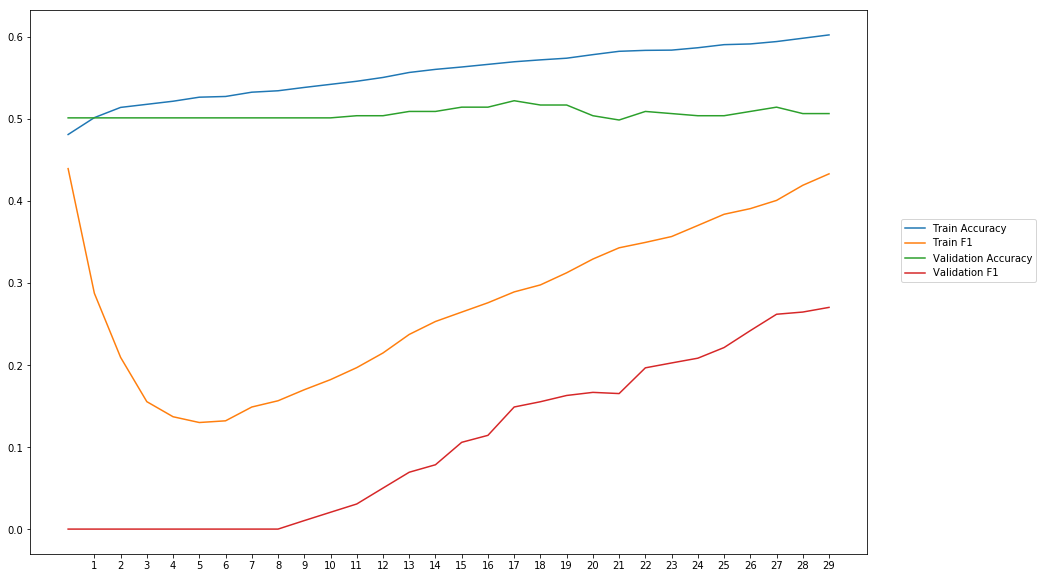

Average Accuracy: 50.63%
Average Precision: 39.11%
Average Recall: 6.44%
Average F1: 10.49%

-----Fold 6--------


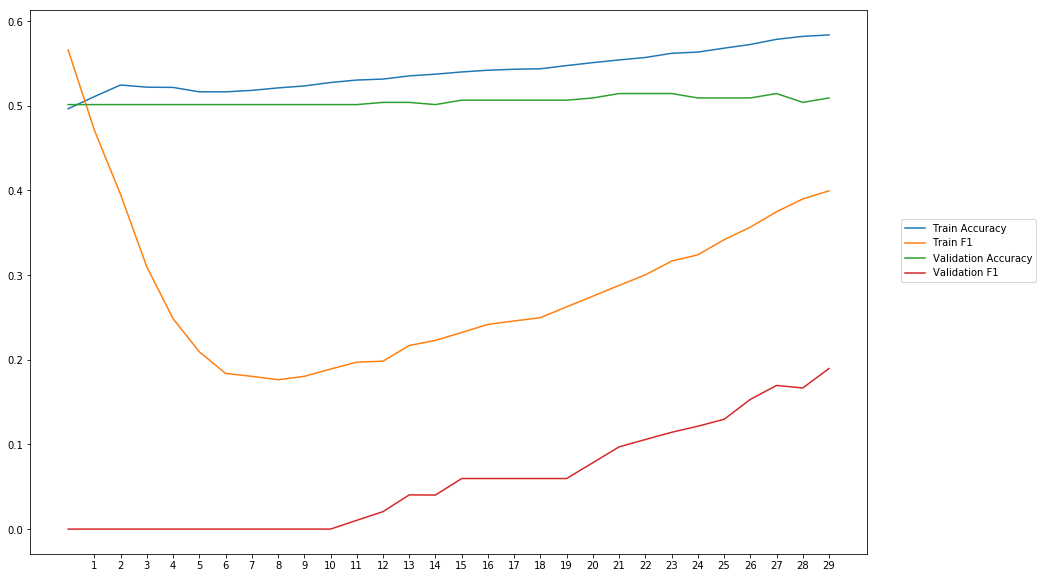

Average Accuracy: 50.55%
Average Precision: 36.99%
Average Recall: 3.25%
Average F1: 5.79%

-----Fold 7--------


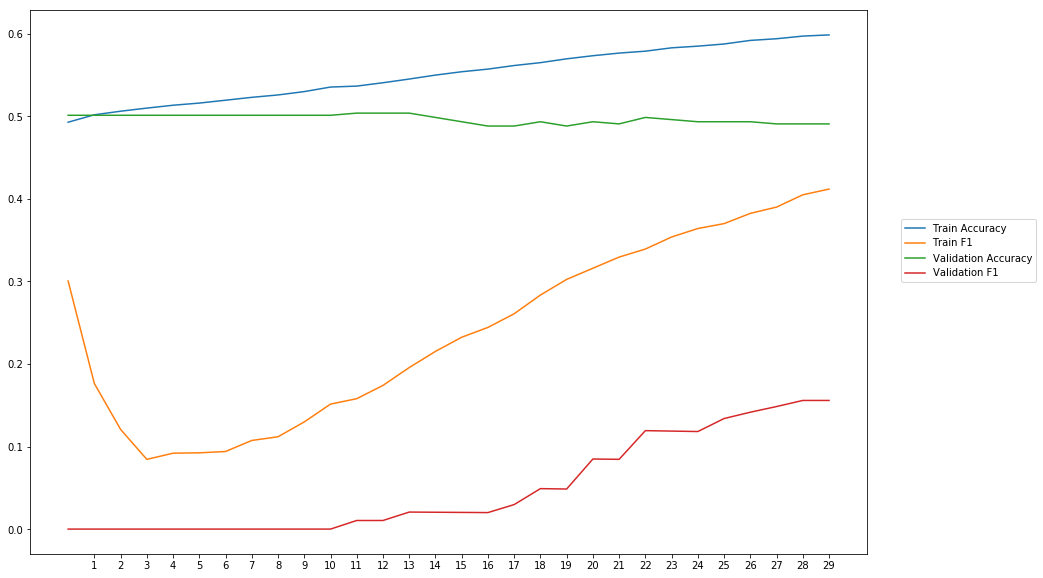

Average Accuracy: 49.70%
Average Precision: 30.19%
Average Recall: 2.86%
Average F1: 4.97%

-----Fold 8--------


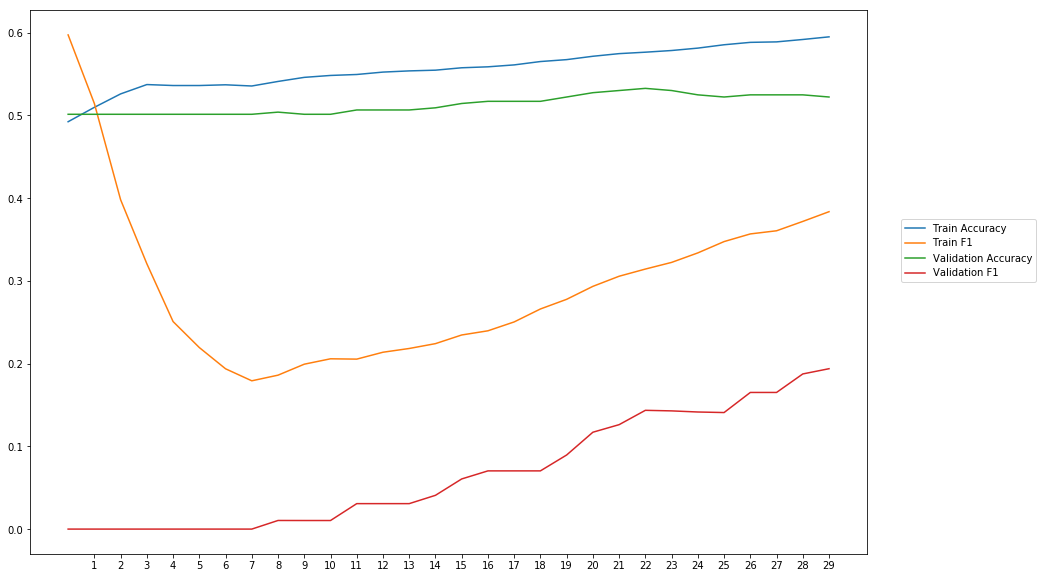

Average Accuracy: 51.32%
Average Precision: 55.85%
Average Recall: 3.77%
Average F1: 6.83%

-----Fold 9--------


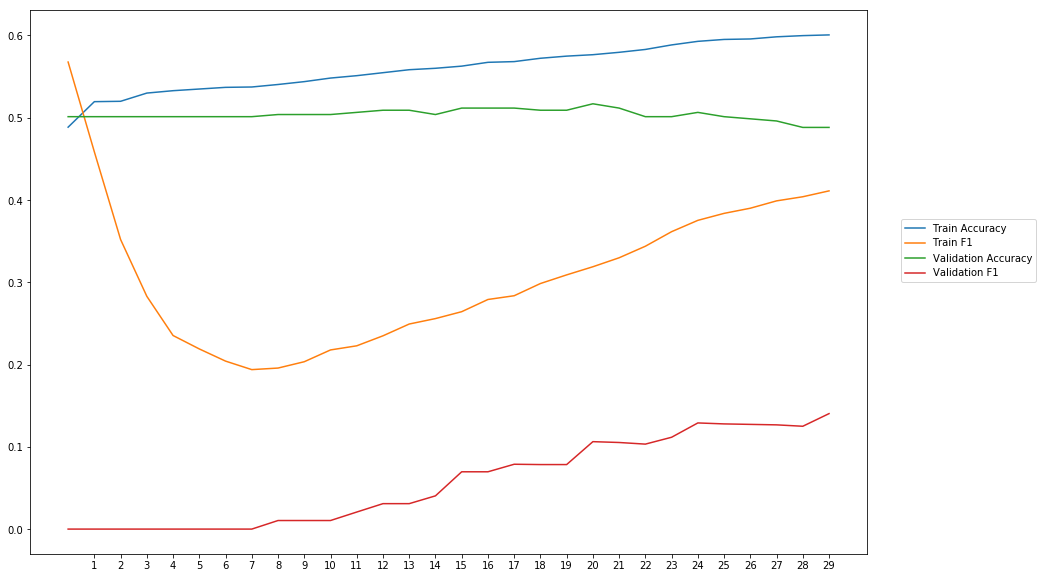

Average Accuracy: 50.38%
Average Precision: 50.04%
Average Recall: 3.21%
Average F1: 5.77%

-----Fold 10--------


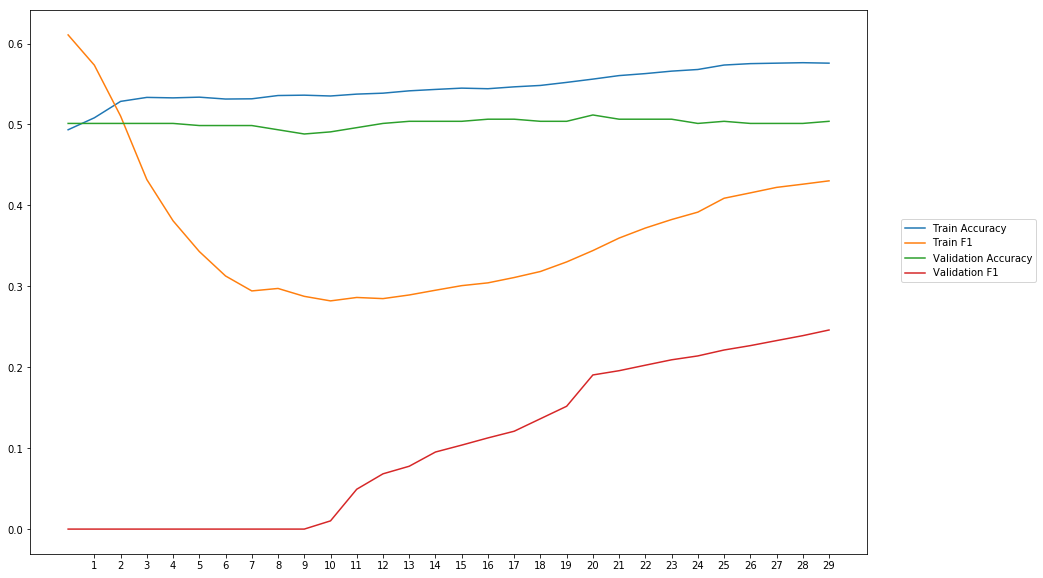

Average Accuracy: 50.17%
Average Precision: 33.06%
Average Recall: 6.35%
Average F1: 10.35%

-------Overallresults-------


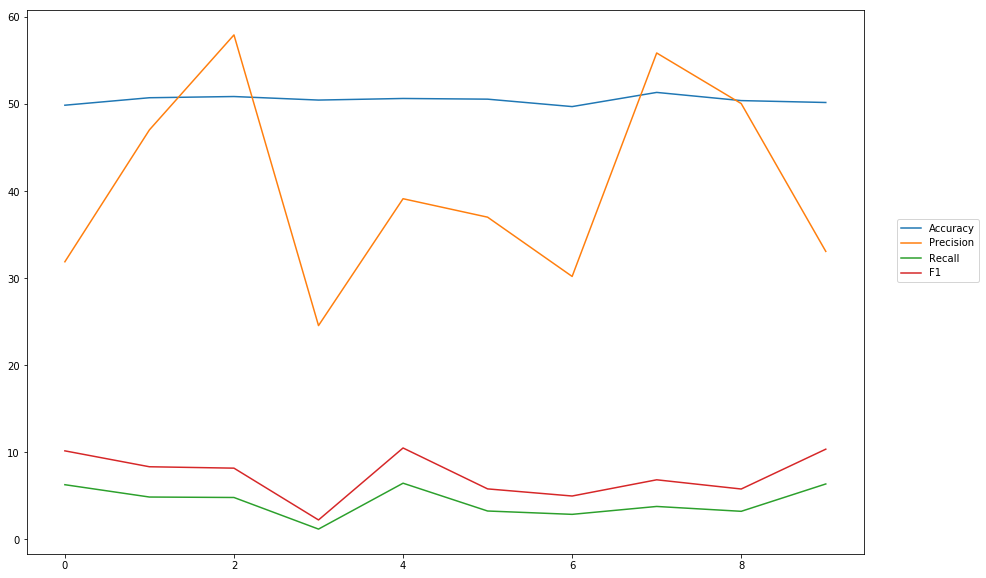

Accuracy: Mean = 50.46% (+/- 0.45%), Max = 51.32%, Min =  49.70%
Precision: Mean = 40.66% (+/- 10.85%), Max = 57.93%, Min =  24.54%
Recall: Mean = 4.30% (+/- 1.66%), Max = 6.44%, Min =  1.17%
F1: Mean = 7.31% (+/- 2.56%), Max = 10.49%, Min =  2.22%


In [60]:
cross_val(model_4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_embedding_sentences_5, train_labels, softmax, outputpath, 'phraseEmbed_5')

### 7 Token

In [61]:
sentences_7, MAX_SENTENCE_LENGTH_7 = getPhrases(7)
train_embedding_sentences_7 =[]
for sentence in sentences_7:
    phr_sent_embedding =[]
    for phrase in sentence:
        phrase_embedding = doc_embed.infer_vector(phrase)
        phr_sent_embedding.append(phrase_embedding)
    train_embedding_sentences_7.append(phr_sent_embedding)

In [62]:
#Input Layer
comment_input_5 = Input(shape=(MAX_SENTENCE_LENGTH_7,300), dtype='float32')

#Dense Layer
x_5 = Dense(600, activation='relu')(comment_input_5)

x_5 = Flatten()(x_5)

#Output (Dense) Layer
preds_5 = Dense(2, activation='softmax')(x_5)

# build the model
model_5 = Model(inputs=[comment_input_5], outputs=preds_5)
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 6, 300)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 6, 600)            180600    
_________________________________________________________________
flatten_5 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 7202      
Total params: 187,802
Trainable params: 187,802
Non-trainable params: 0
_________________________________________________________________



-----Fold 1--------


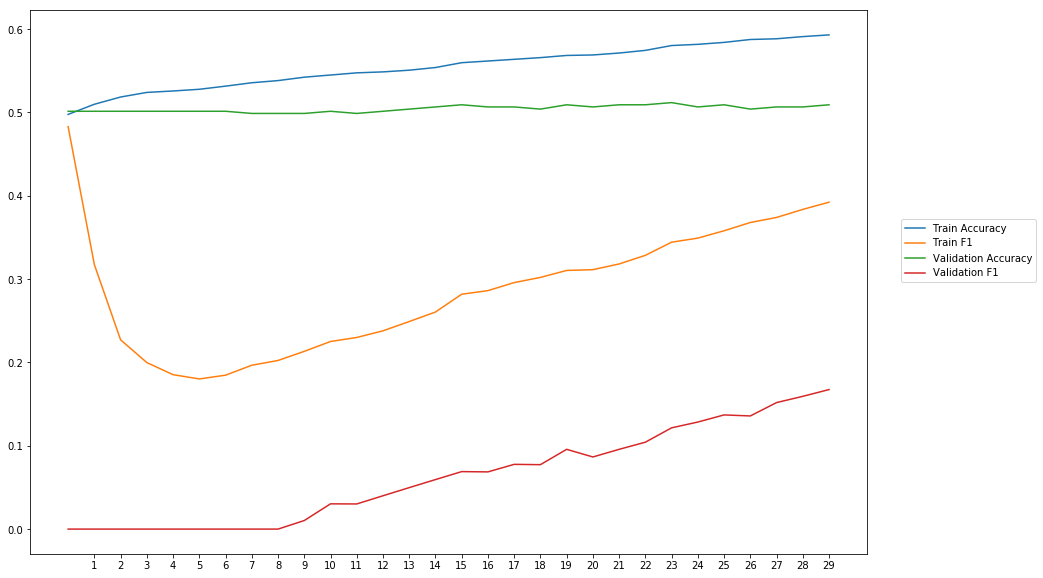

Average Accuracy: 50.43%
Average Precision: 37.89%
Average Recall: 3.52%
Average F1: 6.32%

-----Fold 2--------


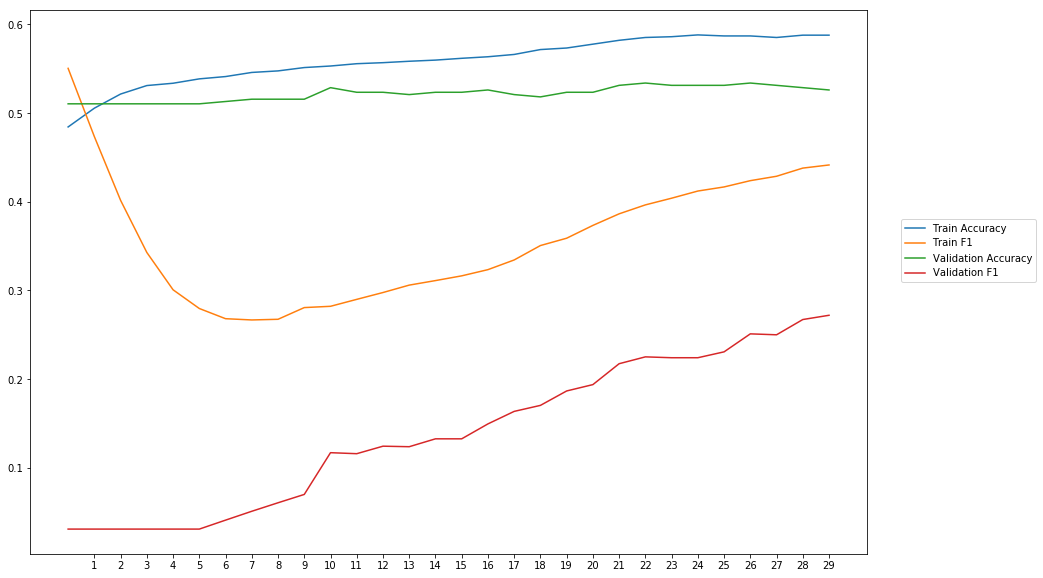

Average Accuracy: 52.19%
Average Precision: 75.92%
Average Recall: 8.22%
Average F1: 13.94%

-----Fold 3--------


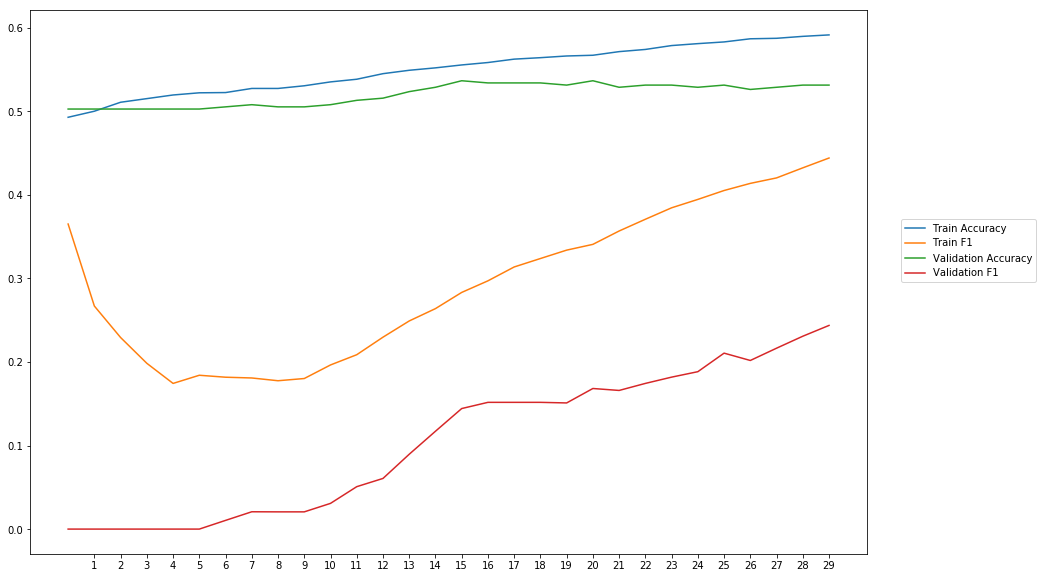

Average Accuracy: 52.01%
Average Precision: 60.80%
Average Recall: 6.02%
Average F1: 10.51%

-----Fold 4--------


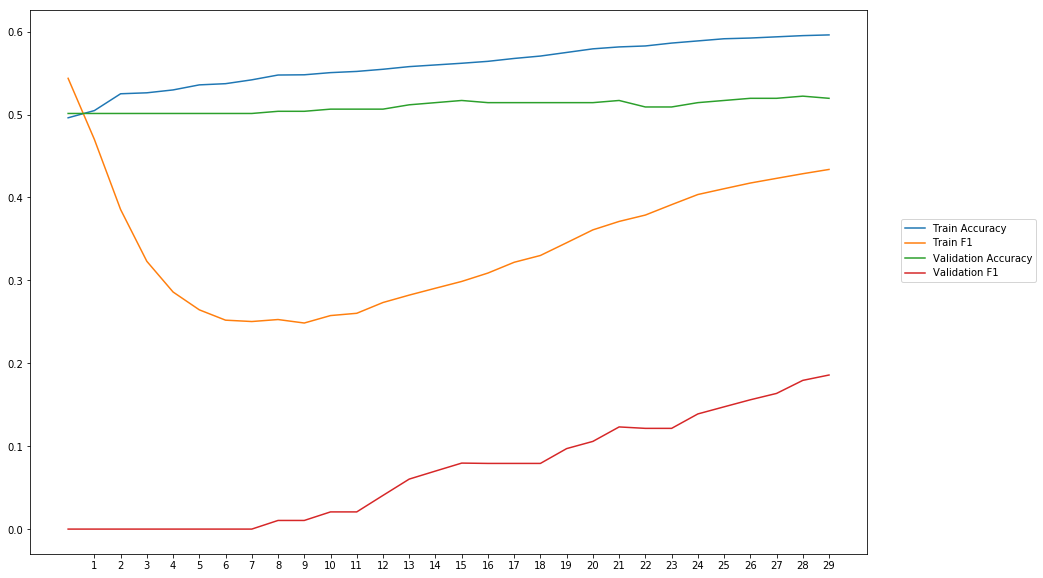

Average Accuracy: 51.00%
Average Precision: 53.20%
Average Recall: 3.87%
Average F1: 6.97%

-----Fold 5--------


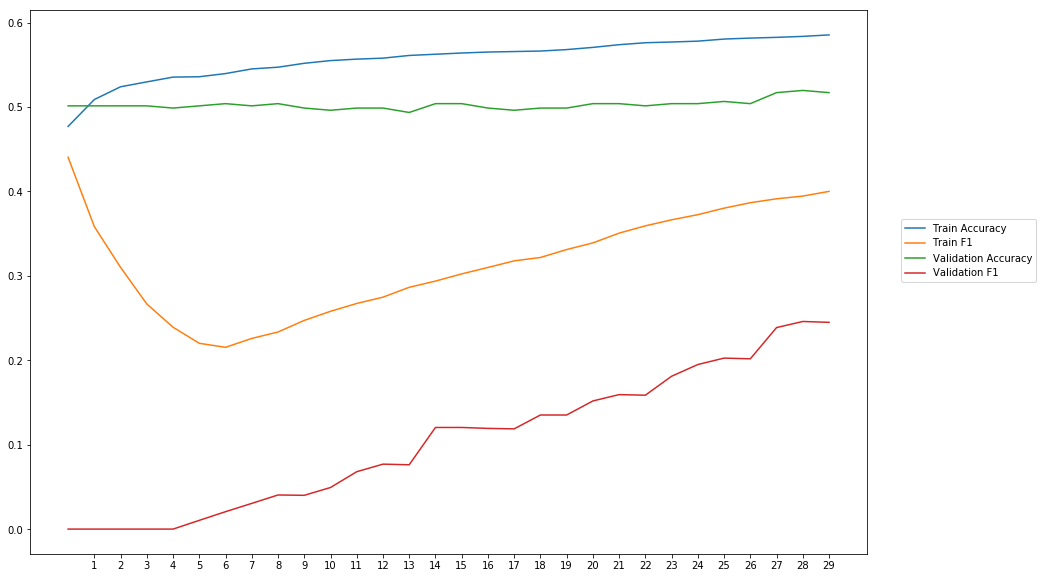

Average Accuracy: 50.27%
Average Precision: 42.25%
Average Recall: 6.25%
Average F1: 10.47%

-----Fold 6--------


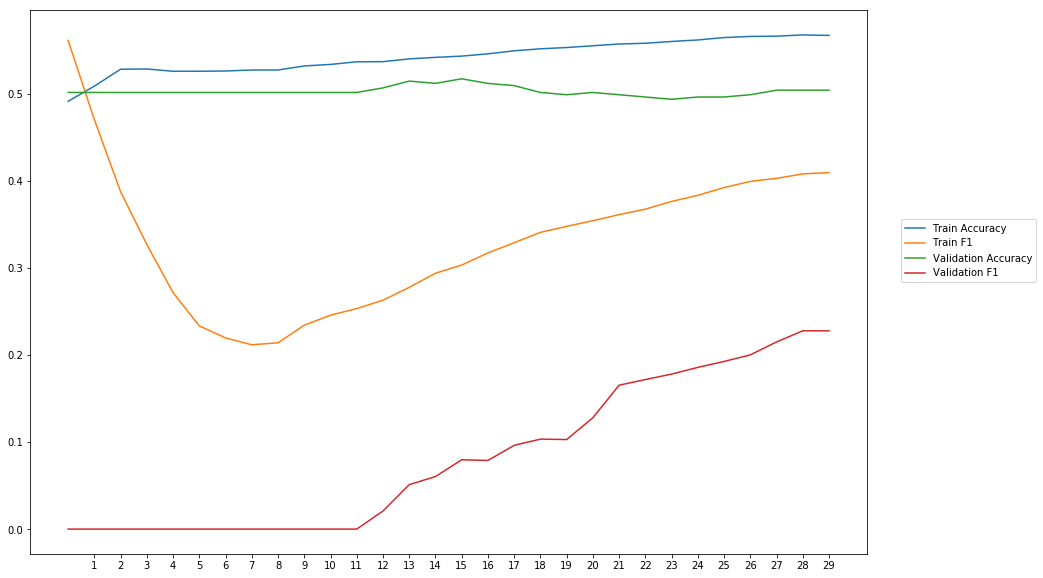

Average Accuracy: 50.26%
Average Precision: 35.63%
Average Recall: 4.99%
Average F1: 8.28%

-----Fold 7--------


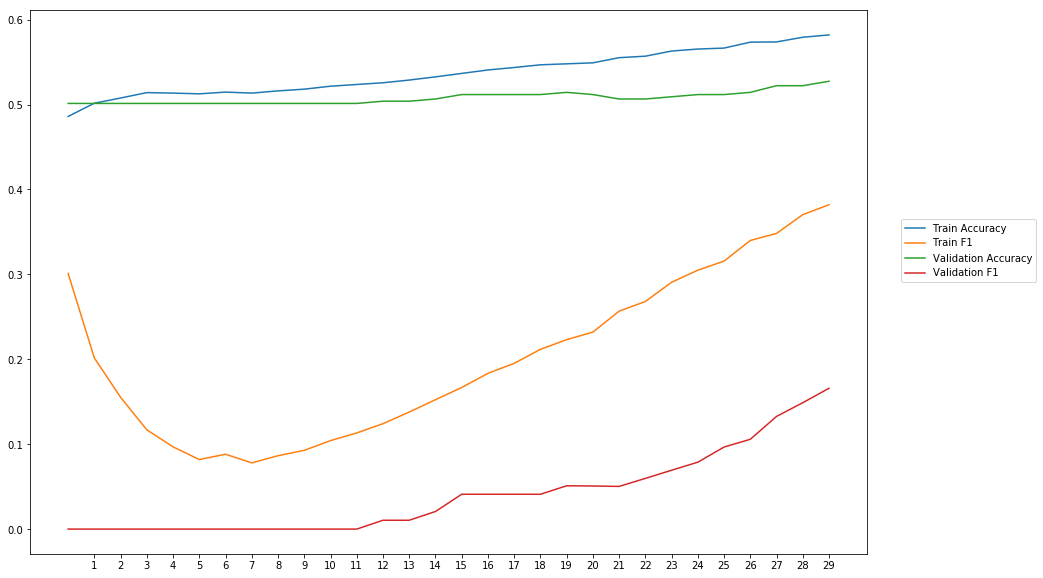

Average Accuracy: 50.78%
Average Precision: 48.97%
Average Recall: 2.18%
Average F1: 4.05%

-----Fold 8--------


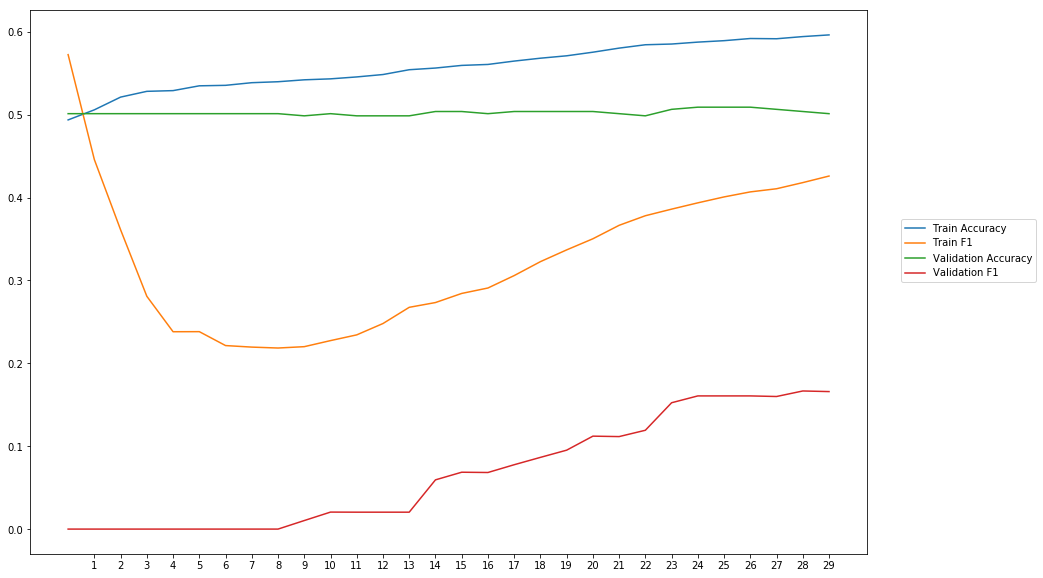

Average Accuracy: 50.26%
Average Precision: 34.73%
Average Recall: 3.84%
Average F1: 6.73%

-----Fold 9--------


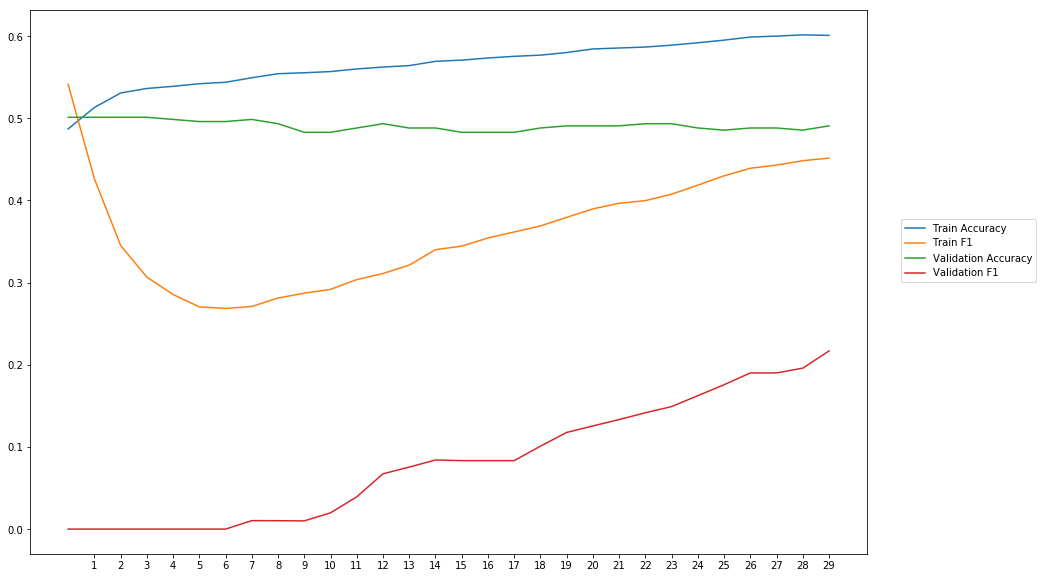

Average Accuracy: 49.12%
Average Precision: 29.08%
Average Recall: 4.94%
Average F1: 8.22%

-----Fold 10--------


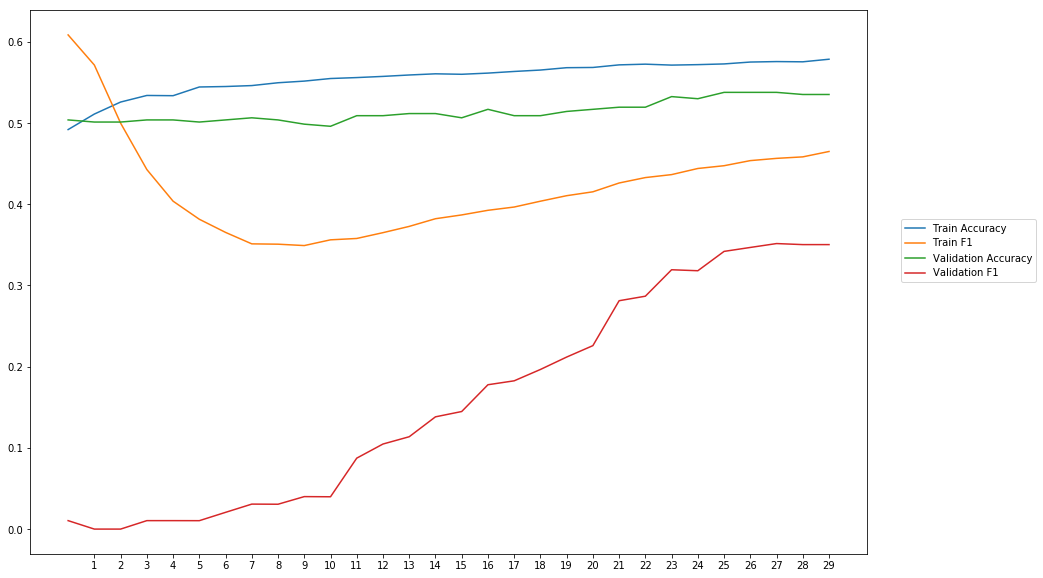

Average Accuracy: 51.42%
Average Precision: 57.38%
Average Recall: 10.35%
Average F1: 15.78%

-------Overallresults-------


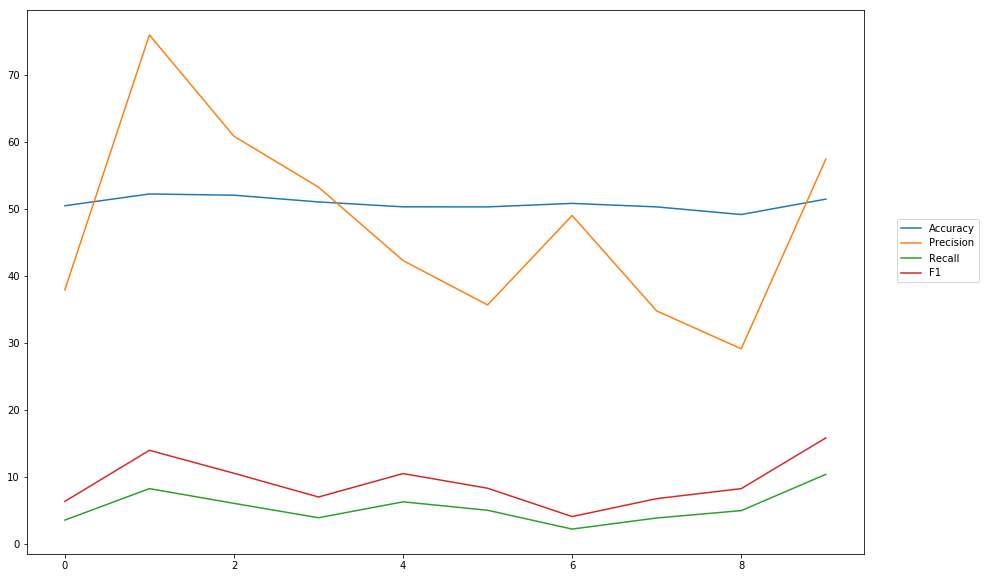

Accuracy: Mean = 50.77% (+/- 0.87%), Max = 52.19%, Min =  49.12%
Precision: Mean = 47.59% (+/- 13.71%), Max = 75.92%, Min =  29.08%
Recall: Mean = 5.42% (+/- 2.29%), Max = 10.35%, Min =  2.18%
F1: Mean = 9.13% (+/- 3.42%), Max = 15.78%, Min =  4.05%


In [63]:
cross_val(model_5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_embedding_sentences_7, train_labels, softmax, outputpath, 'phraseEmbed_7')

# Test the best model with the heldout test data

Instructions for updating:
Use tf.cast instead.


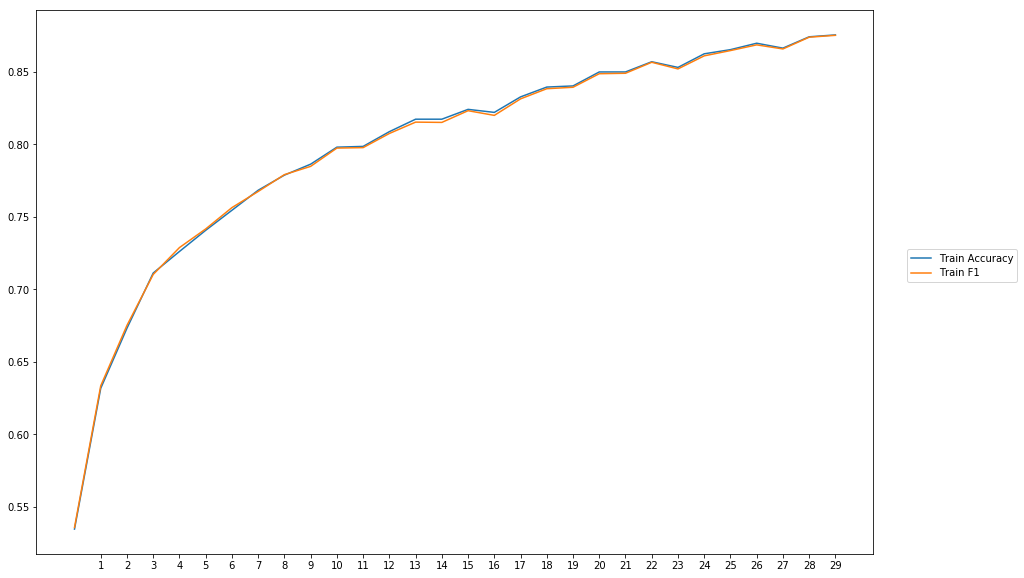


-----Test Scores----
Loss: 0.840822163893252
Accuracy: 55.48469387755102
Precision: 44.83695650955518
Recall: 53.054662362361846
F1: 48.60087867335061


In [12]:
train_evaluate_final_model(model_2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_DocEmbedding')